### Prepocessnig: Importing Dataset & Cleaning

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
file_path = 'Video_Games.csv'  # Update with the actual path to your dataset
vgames_df = pd.read_csv(file_path)

In [3]:
# Exploring the top 10 rows in the dataset
print("Dataset Overview:\n") 
vgames_df.head(10)

Dataset Overview:



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


> Clear from inspecting the dataset that it does feature a number of NaN values across multiple rows and columns

In [4]:
# Exploring the data types in the dataset for consistency across columns
print("\nData Types:\n")
vgames_df.dtypes


Data Types:



Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

> Inspecting the type for each column reveals some obvious issues such as:<br>
> - Year_of_Release column is type float<br>
> - User_Score column is type object, with mixed type float and int<br>
> - User_Count column is type float and ideally this should be type int<br>
> - Multiple NaN values in columns Critic_Score, Critic_Count, User_Score, User_Count, Developer and Rating

In [5]:
# Identifying non-float values in the User_Score column

vgames_df['User_Score'].value_counts()

User_Score
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

> Further investigation of the 'User_Score' column reveals that the string 'tbd' appears as a non-numerical value 2425 times, thus needs to be addresses.

In [6]:
# Cheching for columns with missing values
vgames_df.isnull().sum(), vgames_df.shape

(Name                  2
 Platform              0
 Year_of_Release     269
 Genre                 2
 Publisher            54
 NA_Sales              0
 EU_Sales              0
 JP_Sales              0
 Other_Sales           0
 Global_Sales          0
 Critic_Score       8582
 Critic_Count       8582
 User_Score         6704
 User_Count         9129
 Developer          6623
 Rating             6769
 dtype: int64,
 (16719, 16))

In [7]:
# Checking for missing values in Name column
missing_name = vgames_df[vgames_df['Name'].isnull()]
missing_name

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Checking for missing values in Year_of_Release column
missing_year = vgames_df[vgames_df['Year_of_Release'].isnull()]
missing_year.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN


> Some of the records have the last four digits of the name value carrying the year. I will filter for these records to investigate further perhaps to replace the correct the missing values in Year_of_Release column

In [9]:
# Filter rows where the last 4 characters of 'Name' are digits, ignoring NaN
filtered_year_in_name_records = vgames_df[
    vgames_df['Name'].notnull() & vgames_df['Name'].str[-4:].str.isdigit()
]

# Display the filtered records
filtered_year_in_name_records.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
206,Warzone 2100,PS,1999.0,Strategy,Eidos Interactive,2.79,1.89,0.00,0.33,5.01,NaN,NaN,NaN,NaN,NaN,NaN
238,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53,91.0,30.0,7.9,78.0,EA Tiburon,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39,86.0,19.0,8.9,33.0,Konami,E
283,Madden NFL 2003,PS2,2002.0,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14,95.0,25.0,7.7,65.0,EA Sports,E
338,FIFA Soccer 2005,PS2,2004.0,Sports,Electronic Arts,0.58,2.48,0.04,0.59,3.70,81.0,27.0,7.6,56.0,EA Canada,E
349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63,82.0,10.0,7.9,38.0,Konami,E
359,Just Dance 2014,Wii,2013.0,Misc,Ubisoft,1.88,1.39,0.00,0.31,3.59,NaN,NaN,6.2,10.0,Ubisoft,E10+
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
393,FIFA Soccer 2003,PS2,2002.0,Sports,Electronic Arts,0.46,2.28,0.05,0.61,3.40,88.0,15.0,6.7,35.0,EA Canada,E


In [10]:
# Filter rows where the last 4 characters of 'Name' are digits and where the publisher is EA, ignoring NaN
filtered_year_in_name_records_EA = vgames_df[
    vgames_df['Name'].notnull() & vgames_df['Name'].str[-4:].str.isdigit() & (vgames_df['Publisher'] == 'Electronic Arts')
]

# Display the filtered records
filtered_year_in_name_records_EA.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
238,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53,91.0,30.0,7.9,78.0,EA Tiburon,E
283,Madden NFL 2003,PS2,2002.0,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14,95.0,25.0,7.7,65.0,EA Sports,E
338,FIFA Soccer 2005,PS2,2004.0,Sports,Electronic Arts,0.58,2.48,0.04,0.59,3.70,81.0,27.0,7.6,56.0,EA Canada,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
393,FIFA Soccer 2003,PS2,2002.0,Sports,Electronic Arts,0.46,2.28,0.05,0.61,3.40,88.0,15.0,6.7,35.0,EA Canada,E
452,Madden NFL 2002,PS2,2001.0,Sports,Electronic Arts,2.50,0.16,0.01,0.42,3.08,94.0,23.0,7.9,46.0,EA Sports,E
590,NBA Live 2005,PS2,2004.0,Sports,Electronic Arts,2.03,0.21,0.00,0.35,2.59,84.0,21.0,8.1,44.0,EA Canada,E
841,NBA Live 2004,PS2,2003.0,Sports,Electronic Arts,1.57,0.18,0.00,0.27,2.03,86.0,19.0,7.7,41.0,EA Sports,E
926,FIFA 2000,PS,1998.0,Sports,Electronic Arts,0.22,1.47,0.04,0.14,1.87,NaN,NaN,NaN,NaN,NaN,NaN


> - It appears the four digit suffix of in some of the name columns hints at what year the games where released<br>
> - This is not true for all entries, and it also appears some publishers release games in the year preceeding the release year. This is true for some of the releases by Electronic Arts<br>
> - Being unable to spot the pattern, I'd be dropping missing records in the Year_of_Release, Publisher columns as they only account for about 2% of the dataset<br>

> - Name:  Drop rows with missing Name or Genre since these are likely critical identifiers<br>
> - Year_of_Release: Fill with median values<br>
> - Genre: Drop rows with Null values<br>
> - Publisher: Replace Null values with 'Not Stated'<br>
> - Critic_Score & Critic_Count: Convert Critic_Score to numeric, Critic_Count to int, and replace missing NaN values with Median value<br>
> - User_Score & User_Count: Convert User_Score to numeric, User_Count to int, and replace missing NaN values with Median value<br>
> - Fill categorical columns Developer, Publisher, with 'Unknown' and Rating with 'Not Rated'

In [11]:
# Computing stats for each number column for further analysis
print("\nSummary Statistics:\n")
vgames_df.describe()


Summary Statistics:



,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [12]:
# Filling missing values with the median year, keeping it as float first
year_median = vgames_df['Year_of_Release'].median()
vgames_df['Year_of_Release'] = vgames_df['Year_of_Release'].fillna(year_median).astype(int)

# Filling User_Score and User_Count with their respective medians
vgames_df['User_Score'] = vgames_df['User_Score'].replace('tbd', None).astype(float)  # Handle 'tbd' as missing
vgames_df['User_Score'] = vgames_df['User_Score'].fillna(vgames_df['User_Score'].median()).astype(float)
vgames_df['User_Count'] = vgames_df['User_Count'].fillna(vgames_df['User_Count'].median()).astype(int)

# Filling missing Critic_Score and Critic_Count with their medians
vgames_df['Critic_Score'] = vgames_df['Critic_Score'].fillna(vgames_df['Critic_Score'].median())
vgames_df['Critic_Count'] = vgames_df['Critic_Count'].fillna(vgames_df['Critic_Count'].median()).astype(int)

# Filling categorical columns Developer, Publisher, and Rating with 'Not Rated'
vgames_df['Developer'] = vgames_df['Developer'].fillna('Unknown')
vgames_df['Publisher'] = vgames_df['Publisher'].fillna('Unknown')
vgames_df['Rating'] = vgames_df['Rating'].fillna('Not Rated')

# Dropping rows with missing Name or Genre since these are likely critical identifiers
vgames_df = vgames_df.dropna(subset=['Name', 'Genre'])

# Using Label Encoding for 'Platform' and 'Genre'
le = LabelEncoder()
vgames_df['Platform'] = le.fit_transform(vgames_df['Platform'])
vgames_df['Genre'] = le.fit_transform(vgames_df['Genre'])

print("\nCleaned Data Overview:\n", vgames_df.info())
print("\nRemaining Missing Values:\n", vgames_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  int64  
 2   Year_of_Release  16717 non-null  int64  
 3   Genre            16717 non-null  int64  
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  int64  
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  int64  
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
dtypes: float64(7), int64(5), object(4)
memory usage: 2.2+ MB

Clean

In [13]:
# Defining Numerical and Categorical Features
numerical_features = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'] # Excluding the target 
categorical_features = ['Platform', 'Genre']

# Scaling Numerical Features
scaler = StandardScaler()
scaled_num_features = scaler.fit_transform(vgames_df[numerical_features])

In [14]:
# Verifying Preprocessing
print("\nSome Scaled Numerical Features:")
print(pd.DataFrame(scaled_num_features, columns=numerical_features).head())

print("\nSome Encoded Categorical Features:")
print(vgames_df[['Platform', 'Genre']].head())


Some Scaled Numerical Features:
   Global_Sales   NA_Sales   EU_Sales   JP_Sales  Other_Sales  Critic_Score  \
0     52.972422  50.521473  57.253447  11.956196    45.002649      0.612608   
1     25.651711  35.425297   6.825093  21.799911     3.870431      0.101183   
2     22.602438  18.952271  25.065136  12.020957    17.366940      1.226316   
3     20.825849  18.866218  21.429049  10.369545    15.545982      1.021747   
4     19.921403  13.530925  17.375706  32.841709     5.102255      0.101183   

   Critic_Count  User_Score  User_Count  
0      2.027466    0.652137    0.611985  
1     -0.193147    0.165642   -0.163274  
2      3.655916    0.944034    1.618781  
3      3.655916    0.652137    0.273785  
4     -0.193147    0.165642   -0.163274  

Some Encoded Categorical Features:
   Platform  Genre
0        26     10
1        11      4
2        26      6
3        26     10
4         5      7


### Part A: Single-Feature Linear & Polynomial Regression Model

In [15]:
# Import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

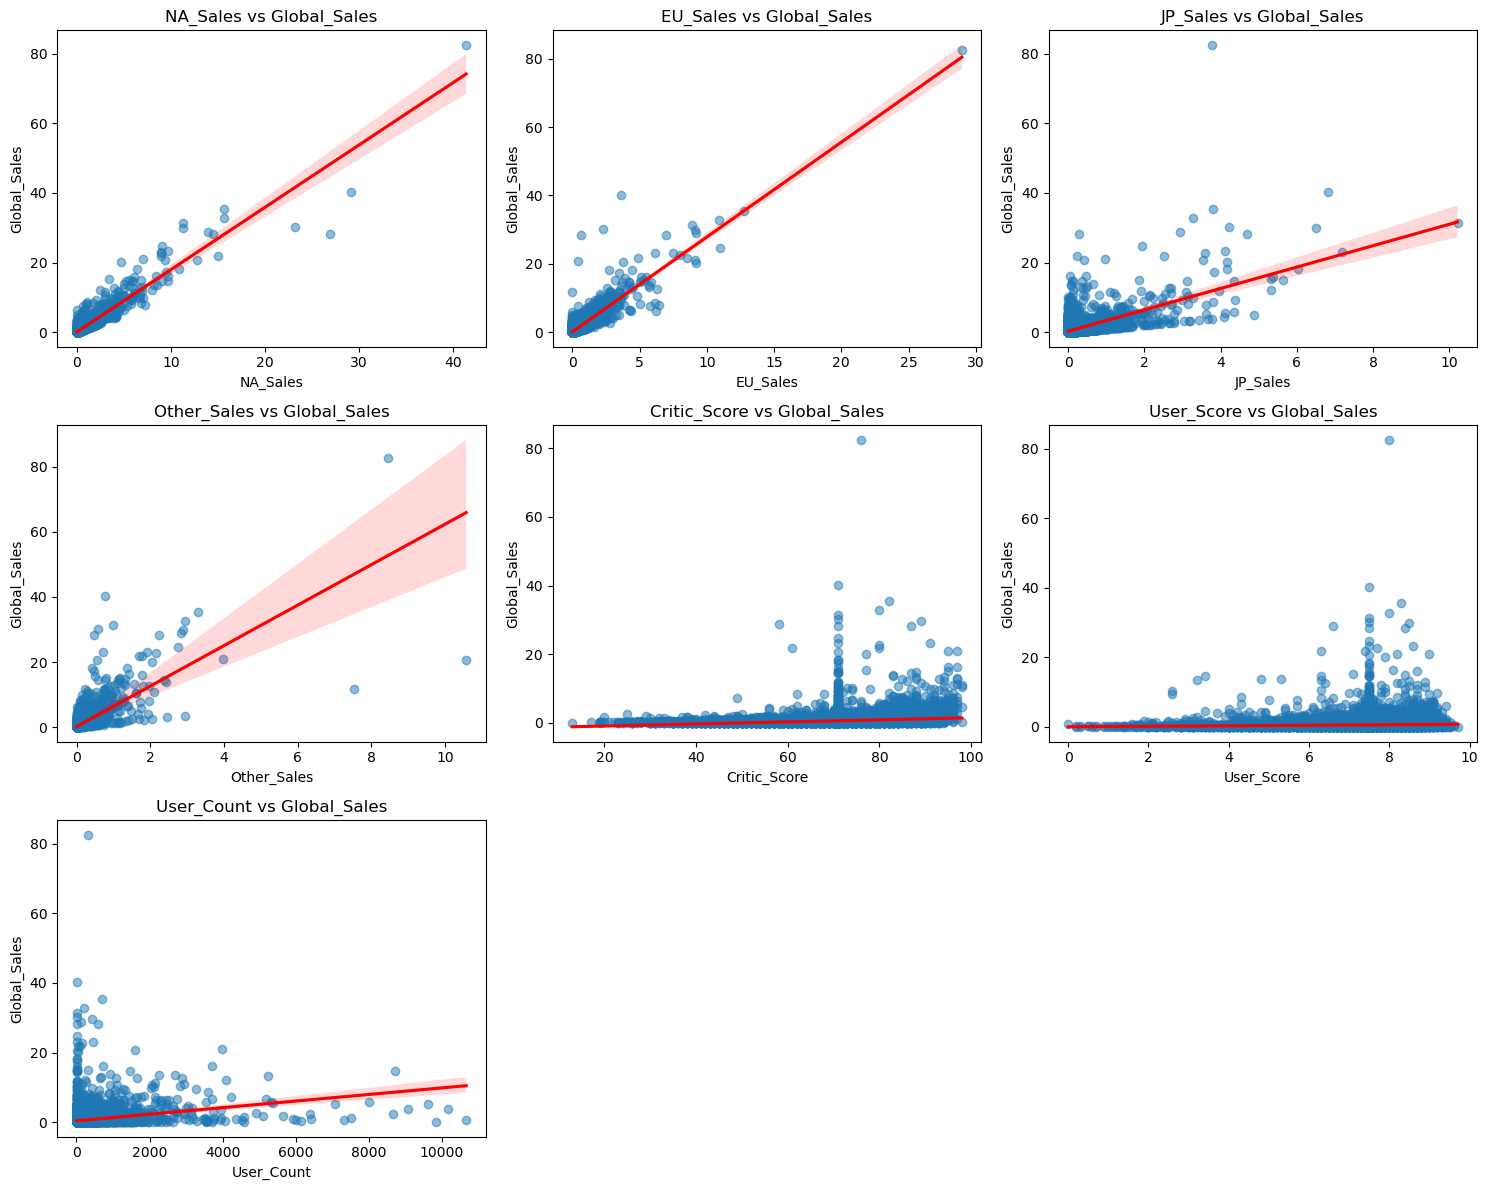

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the overall figure size
plt.figure(figsize=(15, 12))  # (width, height)

# Plotting for NA_Sales vs Global_Sales
plt.subplot(3, 3, 1)  # (rows, columns, plot_number)
sns.regplot(
    x=vgames_df['NA_Sales'],
    y=vgames_df['Global_Sales'],
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5}
)
plt.title('NA_Sales vs Global_Sales')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')

# Plotting for EU_Sales vs Global_Sales
plt.subplot(3, 3, 2)
sns.regplot(
    x=vgames_df['EU_Sales'],
    y=vgames_df['Global_Sales'],
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5}
)
plt.title('EU_Sales vs Global_Sales')
plt.xlabel('EU_Sales')
plt.ylabel('Global_Sales')

# Plotting for JP_Sales vs Global_Sales
plt.subplot(3, 3, 3)
sns.regplot(
    x=vgames_df['JP_Sales'],
    y=vgames_df['Global_Sales'],
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5}
)
plt.title('JP_Sales vs Global_Sales')
plt.xlabel('JP_Sales')
plt.ylabel('Global_Sales')

# Plotting for Other_Sales vs Global_Sales
plt.subplot(3, 3, 4)
sns.regplot(
    x=vgames_df['Other_Sales'],
    y=vgames_df['Global_Sales'],
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5}
)
plt.title('Other_Sales vs Global_Sales')
plt.xlabel('Other_Sales')
plt.ylabel('Global_Sales')

# Plotting for Critic_Score vs Global_Sales
plt.subplot(3, 3, 5)
sns.regplot(
    x=vgames_df['Critic_Score'],
    y=vgames_df['Global_Sales'],
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5}
)
plt.title('Critic_Score vs Global_Sales')
plt.xlabel('Critic_Score')
plt.ylabel('Global_Sales')

# Plotting for User_Score vs Global_Sales
plt.subplot(3, 3, 6)
sns.regplot(
    x=vgames_df['User_Score'],
    y=vgames_df['Global_Sales'],
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5}
)
plt.title('User_Score vs Global_Sales')
plt.xlabel('User_Score')
plt.ylabel('Global_Sales')

# Plotting for User_Count vs Global_Sales
plt.subplot(3, 3, 7)
sns.regplot(
    x=vgames_df['User_Count'],
    y=vgames_df['Global_Sales'],
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5}
)
plt.title('User_Count vs Global_Sales')
plt.xlabel('User_Count')
plt.ylabel('Global_Sales')

# Ensuring layout is displayed correctly without overlaps
plt.tight_layout()
plt.show()

> NA_Sales and EU_Sales appear to have a strong linear relationship with Global_Sales<br>
> JP_Sales and Other_Sales show a moderate positive relationship with Global_Sales<br>
> Critic_Score and User_Score show a weak positive relationship with Global_Sales<br>
> User_Count shows a negligible relationship with Global_Sales<br>
> The upward trends at about 70 and 7.5 Critic_Score and User_Score account for the replaced Null values with the median

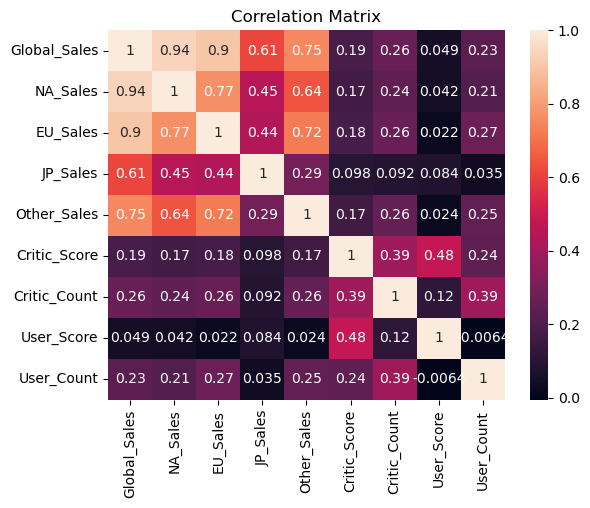

In [17]:
# Plotting correlation matrix to aid feature selection
sns.heatmap(vgames_df[numerical_features].corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

> The strongest correlations with Global_Sales are observed in NA_Sales (0.94), followed by EU_Sales (0.77), Other_Sales (0.75), and JP_Sales (0.61). Additionally, there is a strong correlation between NA_Sales and EU_Sales (0.77). These features are likely to be highly predictive and will be prioritized in the regression models.
>
> Features such as User_Score (0.049) and User_Count (0.23) show weak correlations with Global_Sales, suggesting that user engagement metrics have limited impact on total sales.
>
> Critic_Score (0.26) and Critic_Count (0.39) have weak to moderate correlations, indicating that while professional reviews may play a role, they are not primary drivers of sales. These weaker predictors may not significantly improve model performance and will be deprioritized.

In [18]:
# Importing Libraries for Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# Defining function to train and evaluate linear regression model with single feature input
def eval_lin_reg(dataframe, num_features, target):
    results = {}

    for feature in num_features:
        # Preparing the data
        x = dataframe[[feature]]
        y = dataframe[target]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        # Training the Linear Regression Model
        model = LinearRegression()
        model.fit(x_train, y_train)

        # Predicting on the test set
        y_pred = model.predict(x_test)

        # Evaluating the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rms = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Storing Results
        results[feature] = {'MSE': mse, 'MAE': mae, 'RMS': rms, 'R2': r2}

    return results

In [20]:
# Calling the function and displaying the result in a dataframe
results_l = eval_lin_reg(vgames_df, numerical_features, 'Global_Sales')
results_l_df = pd.DataFrame.from_dict(results_l, orient='index') 
print(f'Linear Regression:\n')
# Setting preffered notation in 6 decimals
pd.set_option('display.float_format', '{:.6f}'.format) # Preferred format for results
results_l_df

Linear Regression:



,MSE,MAE,RMS,R2
Global_Sales,0.000000,0.000000,0.000000,1.000000
NA_Sales,0.287345,0.202356,0.536046,0.930422
EU_Sales,0.299785,0.238920,0.547526,0.927409
JP_Sales,2.820534,0.518119,1.679444,0.317030
Other_Sales,1.167004,0.343432,1.080280,0.717419
Critic_Score,4.039832,0.620101,2.009933,0.021787
Critic_Count,3.902266,0.580111,1.975416,0.055097
User_Score,4.122473,0.611567,2.030387,0.001776
User_Count,4.035142,0.579536,2.008766,0.022923


In [21]:
# Importing Library for Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

In [22]:
# Defining function to train and evaluate polynomial regression model with single feature input
def eval_pol_reg(dataframe, num_features, target, pol_degree):
    results = {}

    for feature in numerical_features: # Iterating over the features in numerical_features (which was defined earlier)
        # Preparing the data
        x = dataframe[[feature]]
        y = dataframe[target]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
        # Polynomial Transformation
        poly = PolynomialFeatures(degree=pol_degree)
        x_poly_train = poly.fit_transform(x_train)
        x_poly_test = poly.transform(x_test)
    
        # Training the Polynomial Regression Model
        model = LinearRegression()  
        model.fit(x_poly_train, y_train)
    
        # Predict (use the same model instance `model_p`)
        y_pred = model.predict(x_poly_test)
        
        # Evaluating the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rms = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Storing Results
        results[feature] = {'MSE': mse, 'MAE': mae, 'RMS': rms, 'R2': r2}

    return results

In [23]:
# Calling the function and displaying the result in a dataframe
results_p = eval_pol_reg(vgames_df, numerical_features, 'Global_Sales', 2)
results_p_df = pd.DataFrame.from_dict(results_p, orient='index') 
print(f'Polynomial Regression:')
# Setting preffered notation in 6 decimals
pd.set_option('display.float_format', '{:.6f}'.format)
results_p_df

Polynomial Regression:


,MSE,MAE,RMS,R2
Global_Sales,0.000000,0.000000,0.000000,1.000000
NA_Sales,0.687693,0.210965,0.829273,0.833481
EU_Sales,0.309615,0.239650,0.556431,0.925029
JP_Sales,2.804124,0.515368,1.674552,0.321004
Other_Sales,1.603200,0.284957,1.266175,0.611798
Critic_Score,3.975925,0.574822,1.993972,0.037261
Critic_Count,3.884258,0.559463,1.970852,0.059458
User_Score,4.114231,0.607930,2.028357,0.003772
User_Count,3.959374,0.564298,1.989818,0.041269


> The analysis reveals that regional sales, particularly NA_Sales and EU_Sales, are the strongest predictors of Global_Sales in both linear and polynomial regression models, achieving high R2 values (0.9304 and 0.9274, respectively) in linear regression. This indicates a strong correlation between regional sales and global sales performance. Other predictors, such as JP_Sales and Other_Sales, contribute moderately, while features like User_Score, and Critic_Score show minimal predictive strenght with low or even negative R2 values, making them poor predictors.

> Linear regression consistently outperforms or matches polynomial regression for most features, suggesting that the relationship between these variables and Global_Sales is largely linear. Polynomial regression does not significantly improve predictive accuracy and, in some cases (e.g., NA_Sales), results in reduced performance due to potential overfitting. Moving forward, focusing on NA_Sales, EU_Sales, and JP_Sales as input features while exploring multi-feature regression models could further enhance predictive accuracy and uncover interactions between these key variables.

### Part B: Multi-Feature Linear & Polynomial Regression Model

In [24]:
# Defining function to train and evaluate linear regression model with multiple feature input
def eval_mult_lin_reg(dataframe, sel_features, target):
    results = {}

    # Preparing the data
    x = dataframe[sel_features]
    y = dataframe[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Training the Linear Regression Model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(x_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rms = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Storing Results
    results = {'MSE': mse, 'MAE': mae, 'RMS': rms, 'R2': r2}

    return results

In [25]:
# Selecting relevant numerical features based on Part A
selected_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']  # Selected predictors from earlier analysis

# Calling the function and displaying the result in a dataframe
results_ml = eval_mult_lin_reg(vgames_df, selected_features, 'Global_Sales')

# Creating the DataFrame with 'Multiple Features' in the Model column
results_ml_df = pd.DataFrame(results_ml, index=['Multiple Features']).reset_index()

# Renaming the index column to 'Model'
results_ml_df.rename(columns={'index': 'Model'}, inplace=True)

# Displaying the dataframe
results_ml_df

,Model,MSE,MAE,RMS,R2
0,Multiple Features,0.000027,0.002911,0.005225,0.999993


In [26]:
# Adding a 'Model' column to results_df_l
results_l_df['Model'] = results_l_df.index

# Combining the DataFrames for comparison 
combined_results = pd.concat([results_l_df.iloc[[1, 2, 3, 4]], results_ml_df], ignore_index=True)

# Defining desired order
desired_order = ['Model', 'MSE', 'MAE', 'RMS', 'R2']

# Setting preffered notation in 6 decimals
pd.set_option('display.float_format', '{:.6f}'.format)

# Print the combined DataFrame
combined_results[desired_order]

,Model,MSE,MAE,RMS,R2
0,NA_Sales,0.287345,0.202356,0.536046,0.930422
1,EU_Sales,0.299785,0.238920,0.547526,0.927409
2,JP_Sales,2.820534,0.518119,1.679444,0.317030
3,Other_Sales,1.167004,0.343432,1.080280,0.717419
4,Multiple Features,0.000027,0.002911,0.005225,0.999993


> The results demonstrate that NA_Sales is the best single-feature predictor of Global_Sales, with the highest R2 value (0.930), followed closely by EU_Sales (R2 = 0.927). These features indicate strong regional influence on global sales. Other_Sales also shows moderate predictive power (R2 = 0.717), while JP_Sales has limited predictive value (R2 = 0.317). The multi-feature regression model, combining all features, significantly outperforms single-feature models with an almost perfect R2 of 0.999 and minimal errors (MSE = 0.000027, MAE = 0.002911). This demonstrates the advantage of integrating multiple predictors to capture the complex relationships affecting global sales performance.

### Part C: Random Forest Regression Model for Categorical and Numerical Input

In [27]:
# Importing Libraries for Categoricals, Tree-based Models
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# Combine only numerical features with properly One-Hot Encoded categoricals
platform_cat = vgames_df['Platform'].to_numpy().reshape(-1, 1)  # Reshape to (n_samples, 1)
genre_cat = vgames_df['Genre'].to_numpy().reshape(-1, 1)

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Encode Platform
platform_encoded = onehot_encoder.fit_transform(platform_cat)

# Encode Genre
genre_encoded = onehot_encoder.fit_transform(genre_cat)

# Print the results
print("Platform Encoded:\n", platform_encoded)
print("Genre Encoded:\n", genre_encoded)

Platform Encoded:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Genre Encoded:
 [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


/Users/ekeleabel/miniconda3/envs/tf_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/ekeleabel/miniconda3/envs/tf_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
# Extract numerical features
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
numerical_data = vgames_df[numerical_features].to_numpy()

# Combine numerical features with encoded categorical features
x_data = np.hstack([numerical_data, platform_encoded, genre_encoded])

# Extract target variable
y_data = vgames_df['Global_Sales'].to_numpy()

# Split the data into training and testing sets
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("x_train shape:", xrf_train.shape)
print("x_test shape:", xrf_test.shape)
print("y_train shape:", yrf_train.shape)
print("y_test shape:", yrf_test.shape)

x_train shape: (13373, 45)
x_test shape: (3344, 45)
y_train shape: (13373,)
y_test shape: (3344,)


In [30]:
# Initializing the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model_rf.fit(xrf_train, yrf_train)

# Predicting on the test set
y_pred_rf = model_rf.predict(xrf_test)

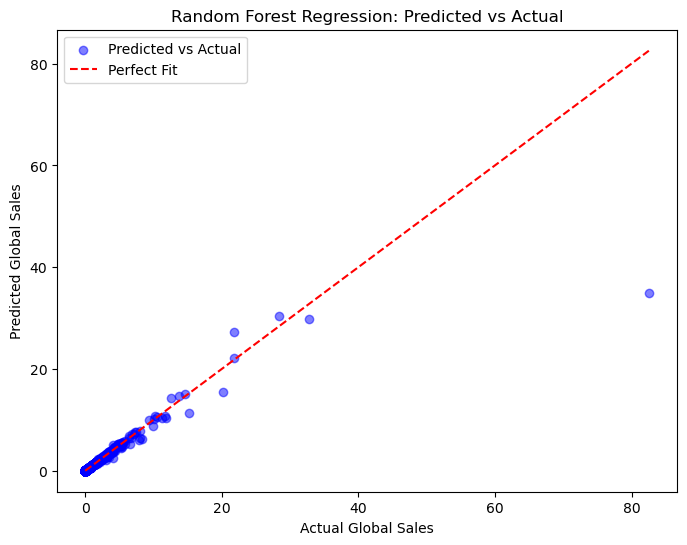

In [31]:
# Assuming y_test contains actual values and y_pred_rf contains predictions
plt.figure(figsize=(8, 6))
plt.scatter(yrf_test, y_pred_rf, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([yrf_test.min(), yrf_test.max()], [yrf_test.min(), yrf_test.max()], 'r--', label='Perfect Fit')  # Diagonal line
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.legend()
plt.show()

In [32]:
results_rf = {}

# Evaluating the model
mse_rf = mean_squared_error(yrf_test, y_pred_rf)
mae_rf = mean_absolute_error(yrf_test, y_pred_rf)
rms_rf = np.sqrt(mse_rf)
r2_rf = r2_score(yrf_test, y_pred_rf)

# Storing results
results_rf = {'Model': 'RF (Num. + Encoded Cat.)', 'MSE': mse_rf, 'MAE': mae_rf, 'RMS': rms_rf, 'R2': r2_rf}
results_rf_df = pd.DataFrame([results_rf]) 

# Printing the results
print(f"RF Regressor (Numerical + Encoded Categorical):")
results_rf_df

RF Regressor (Numerical + Encoded Categorical):


,Model,MSE,MAE,RMS,R2
0,RF (Num. + Encoded Cat.),0.714320,0.040298,0.845174,0.827033


In [33]:
# Combining the DataFrames
combined_results_2 = pd.concat([results_l_df.iloc[[1, 2, 3, 4]], results_ml_df, results_rf_df], ignore_index=True)

# Defining desired order
desired_order = ['Model', 'MSE', 'MAE', 'RMS', 'R2']

# Print the combined DataFrame
combined_results_2[desired_order]

,Model,MSE,MAE,RMS,R2
0,NA_Sales,0.287345,0.202356,0.536046,0.930422
1,EU_Sales,0.299785,0.238920,0.547526,0.927409
2,JP_Sales,2.820534,0.518119,1.679444,0.317030
3,Other_Sales,1.167004,0.343432,1.080280,0.717419
4,Multiple Features,0.000027,0.002911,0.005225,0.999993
5,RF (Num. + Encoded Cat.),0.714320,0.040298,0.845174,0.827033


> The results indicate that the Random Forest model, which incorporates both numerical and encoded categorical variables, achieves an R2 of 0.833, slightly underperforms the numerical-only multiple features model. This suggests that while categorical data provides additional insights, its inclusion may introduce complexity that slightly diminishes predictive performance in this case.

### Part D: Artificial Neural Network (ANN) Regression

In [38]:
# Importing Standard Scaler library for ANN model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam

# Importing relevant liberaries from Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [35]:
# Extract numerical features
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
numerical_data = vgames_df[numerical_features].to_numpy()

# Combine numerical features with encoded categorical features
x_data = np.hstack([numerical_data, platform_encoded, genre_encoded])

# Extract target variable
y_data = vgames_df['Global_Sales'].to_numpy()

xann_train, xann_test, yann_train, yann_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("x_train shape:", xann_train.shape)
print("x_test shape:", xann_test.shape)
print("y_train shape:", yann_train.shape)
print("y_test shape:", yann_test.shape)

x_train shape: (13373, 45)
x_test shape: (3344, 45)
y_train shape: (13373,)
y_test shape: (3344,)


In [44]:
# Check the shape of the preprocessed training data
input_shape = xann_train.shape[1]  # Dynamically get the number of features

# Building the ANN model
model_ann = Sequential()

# Input layer
model_ann.add(Input(shape=(input_shape,)))

# First hidden layer
model_ann.add(Dense(units=64, activation='relu'))

# Second hidden layer
model_ann.add(Dense(units=64, activation='relu'))
model_ann.add(Dropout(0.3))  # Regularization to reduce overfitting

# Output layer
model_ann.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                2944      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Import the EarlyStopping class from Keras
from keras.callbacks import EarlyStopping

# Defining early stopping parameters
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,         # Stop training if no improvement after 20 epochs
    restore_best_weights=True  # Restore model weights from the epoch with the best val_loss
)

# Training the model
history = model_ann.fit(
    xann_train, yann_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=50,            # Maximum number of epochs
    batch_size=32,        # Number of samples per batch
    verbose=1,            # Print progress bar for training
    callbacks=[early_stopping]  # Include early stopping
)

Epoch 1/50
335/335 [==============================] - 3s 6ms/step - loss: 1.2087 - mae: 0.4049 - val_loss: 1.0638 - val_mae: 0.3500
Epoch 2/50
335/335 [==============================] - 1s 4ms/step - loss: 0.6045 - mae: 0.3000 - val_loss: 0.3954 - val_mae: 0.2083
Epoch 3/50
335/335 [==============================] - 1s 4ms/step - loss: 0.2671 - mae: 0.2084 - val_loss: 0.0936 - val_mae: 0.1131
Epoch 4/50
335/335 [==============================] - 1s 3ms/step - loss: 0.1106 - mae: 0.1700 - val_loss: 0.0318 - val_mae: 0.0793
Epoch 5/50
335/335 [==============================] - 1s 3ms/step - loss: 0.0767 - mae: 0.1499 - val_loss: 0.0214 - val_mae: 0.0690
Epoch 6/50
335/335 [==============================] - 1s 3ms/step - loss: 0.0658 - mae: 0.1312 - val_loss: 0.0178 - val_mae: 0.0653
Epoch 7/50
335/335 [==============================] - 1s 3ms/step - loss: 0.0604 - mae: 0.1196 - val_loss: 0.0140 - val_mae: 0.0639
Epoch 8/50
335/335 [==============================] - 1s 3ms/step - loss: 0.

105/105 [==============================] - 1s 2ms/step


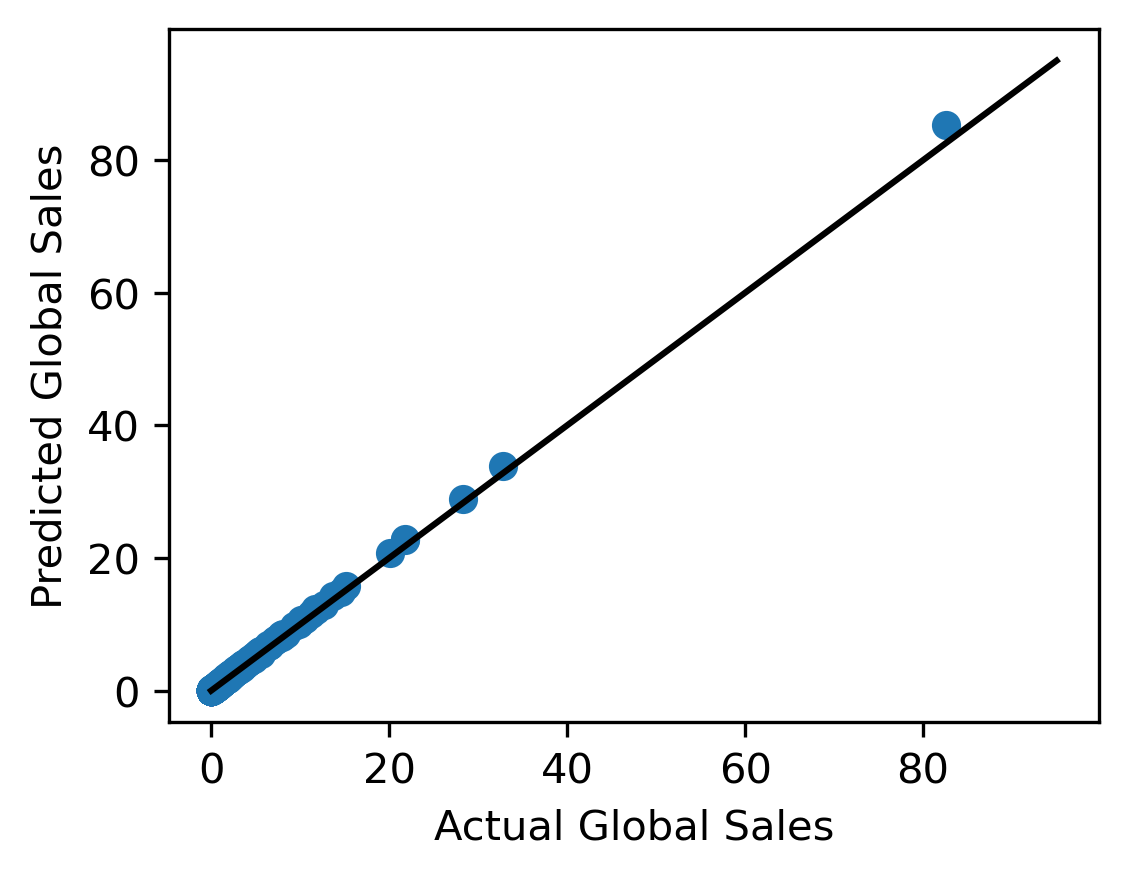

In [41]:
# Predicting the model outputs for the testing set.
yann_pred = model_ann.predict(xann_test)

# Plotting the predicted vs actual
plt.figure(figsize = (4, 3), dpi = 300)
plt.scatter(yann_test, yann_pred)
plt.plot([0, 95], [0, 95], 'k-')
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.show()

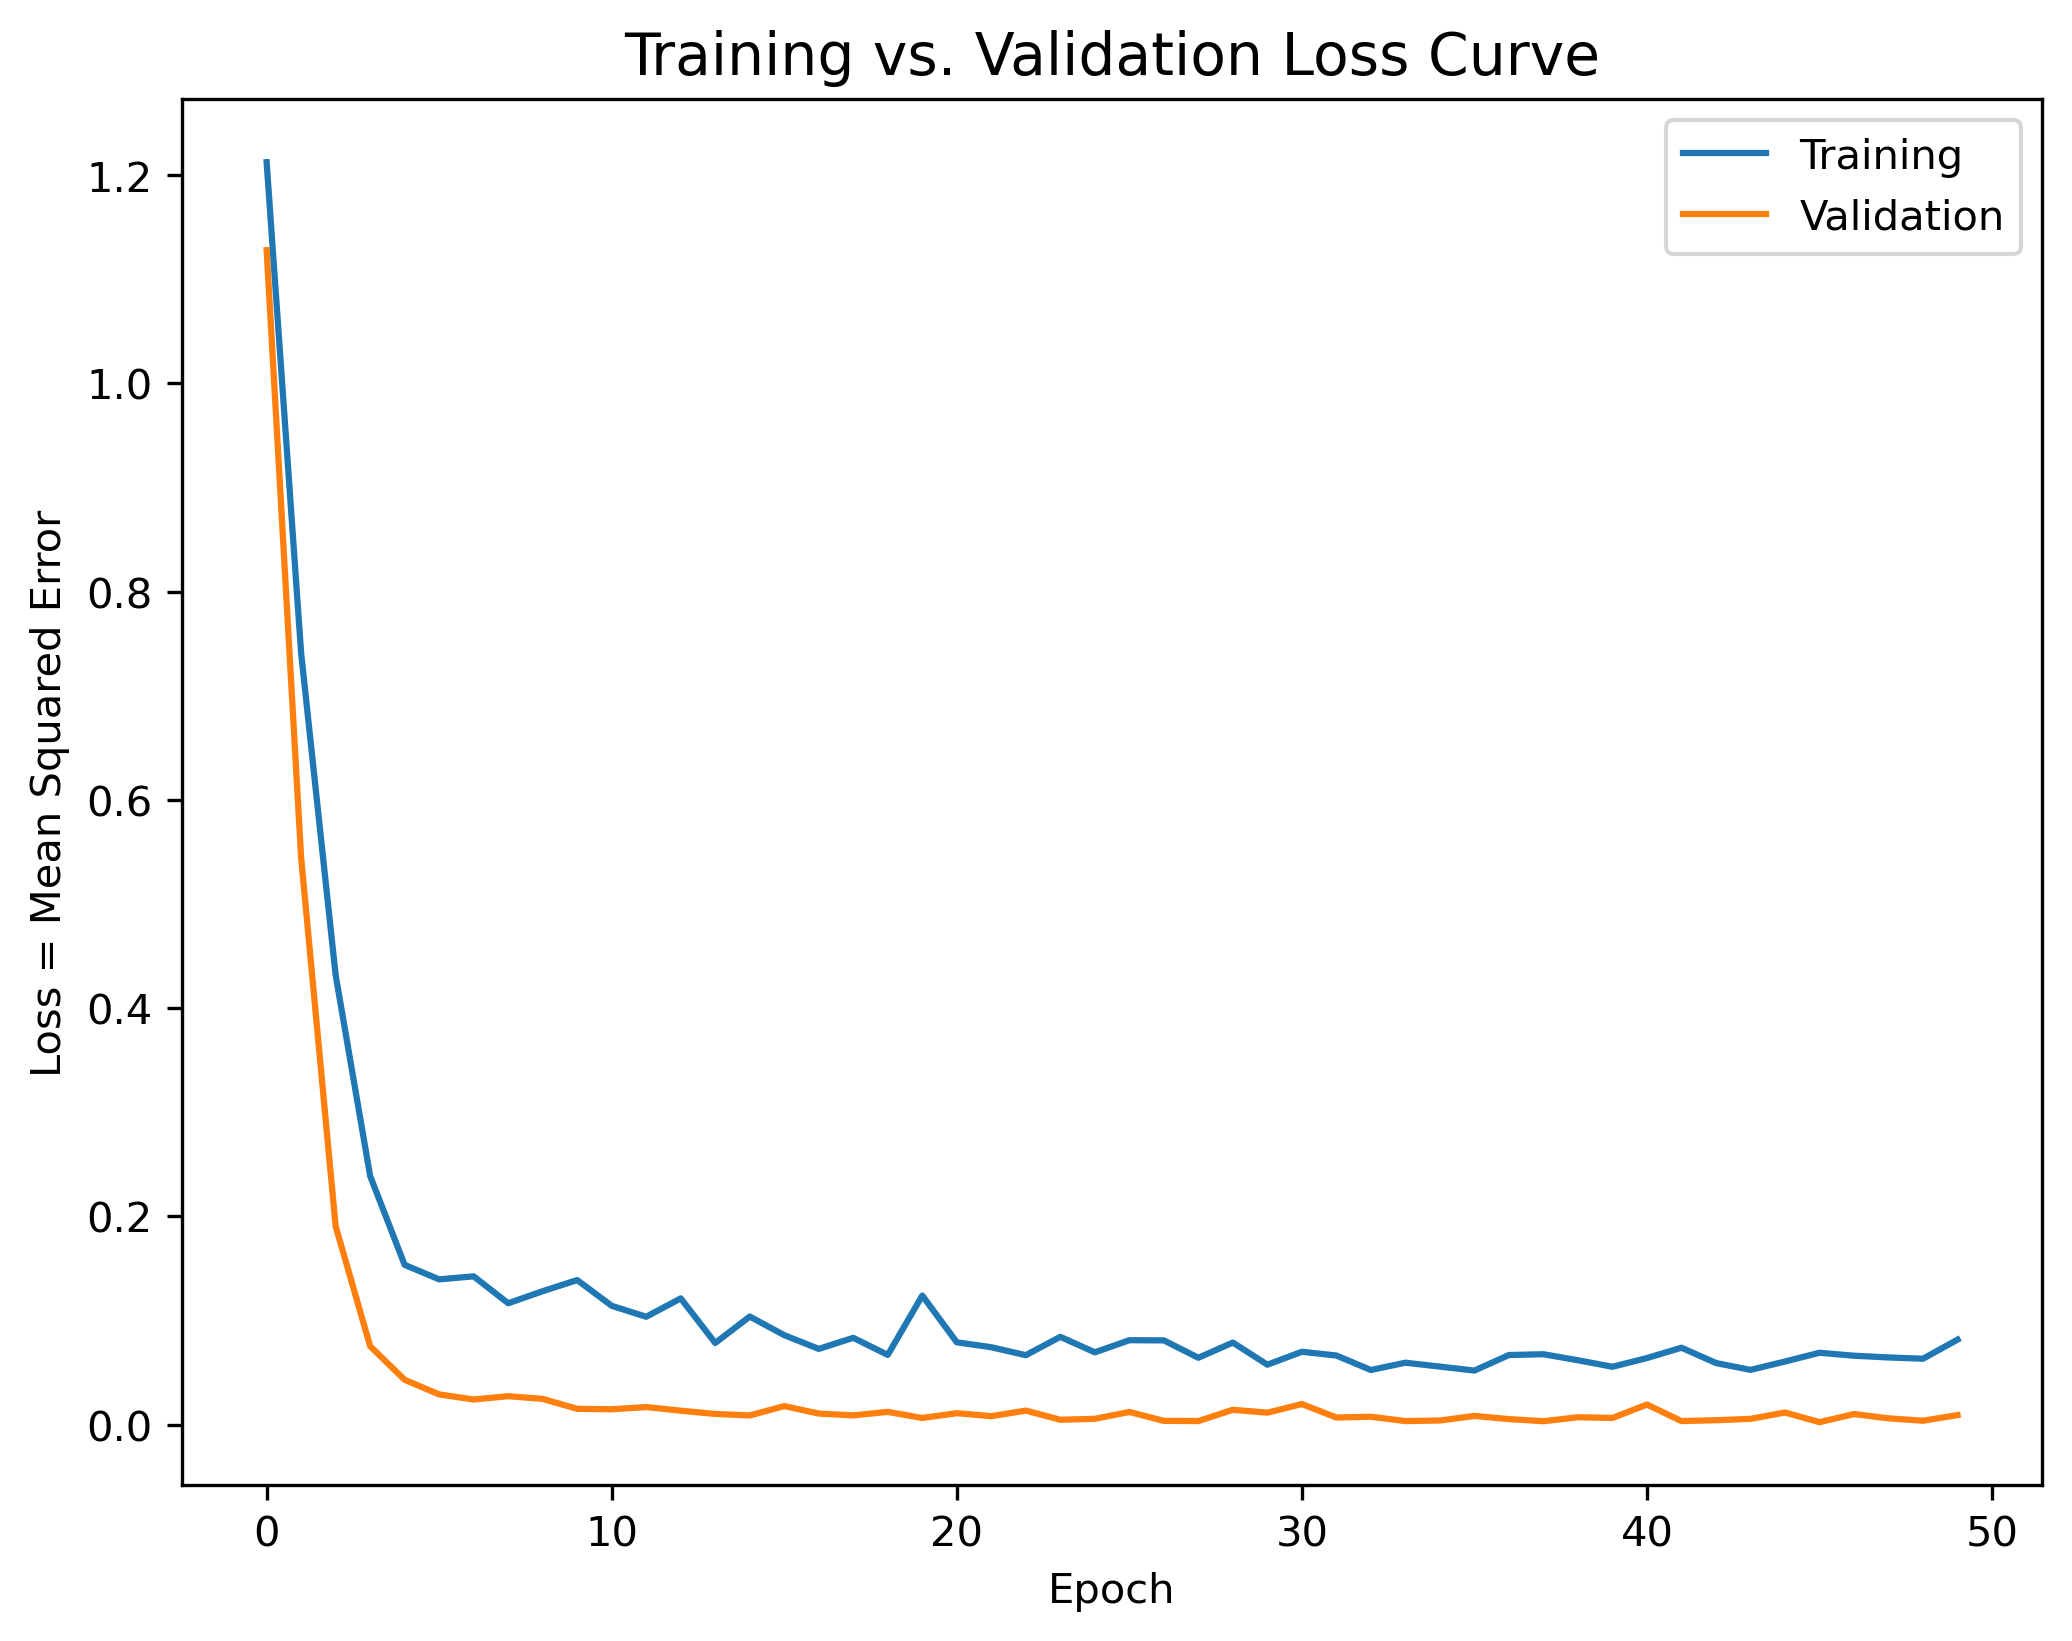

In [42]:
# Creating a dataframe containing the history of the fitting.
history_df = pd.DataFrame(history.history)

# Plotting the history of the training and validation losses.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
plt.legend()
plt.title('Training vs. Validation Loss Curve', fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.show()

> The chart shows the training and validation loss over 50 epochs. Both losses decrease sharply in the initial epochs and stabilize around low values, indicating the model quickly learns patterns and generalizes well without significant overfitting. Minor fluctuations in validation loss suggest sensitivity to data noise, but the alignment between training and validation loss reflects model performance.

In [43]:
results_ann = {}

# Evaluating the model on the test set
mse_ann, mae_ann = model_ann.evaluate(xann_test, yann_test, verbose=1)
y_pred_ann = model_ann.predict(xann_test)

from sklearn.metrics import r2_score
r2_ann = r2_score(yann_test, y_pred_ann)

results_ann = {'Model': 'ANN Model', 'MSE': mse_ann, 'MAE': mae_ann, 'R2': r2_ann}
results_ann_df = pd.DataFrame([results_ann]) 

# Displaying performance results
results_ann_df

105/105 [==============================] - 0s 2ms/step


,Model,MSE,MAE,R2
0,ANN Model,0.008412,0.035814,0.997963


> The ANN model demonstrates excellent performance, with an impressive R2 value of 0.997963, indicating that it explains nearly all the variance in Global_Sales. The MSE (0.008412) and MAE (0.035814) are very low, reflecting minimal prediction errors. It is an effective predictor of global sales, capturing complex patterns in the data with precision.

### Part D: Tuning for Better Results - Artificial Neural Network (ANN) Regression 

In [46]:
# Improving on the ANN model
model_ann = Sequential()

# Using the add() function to add each layer of the network 
model_ann.add(Input(shape=(xann_train.shape[1],))) # Defining the Input shape based on the number of features

# Input layer
model_ann.add(Dense(128, activation='relu'))

# Hidden layers
model_ann.add(Dense(units = 64, activation='relu'))
model_ann.add(Dropout(0.3))  # Dropout to reduce overfitting
model_ann.add(Dense(units = 32, activation='relu'))

# Output layer
model_ann.add(Dense(units = 1, activation='linear'))

# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model summary
model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               5888      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,257
Trainable params: 16,257
Non-trainable params: 0
_________________________________________________________________


In [47]:
#Importing Adam from tensorflow to tune learning rate
from tensorflow.keras.optimizers import Adam

# Using a custom learning rate
model_ann.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error', metrics=['mae'])

In [48]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model_ann.fit(
    xann_train, yann_train,
    validation_split=0.2,
    epochs=100,  # Increase epochs with early stopping
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
335/335 [==============================] - 2s 4ms/step - loss: 1.8350 - mae: 0.4813 - val_loss: 2.1139 - val_mae: 0.4559
Epoch 2/100
335/335 [==============================] - 1s 3ms/step - loss: 1.3279 - mae: 0.4334 - val_loss: 1.4012 - val_mae: 0.4019
Epoch 3/100
335/335 [==============================] - 1s 4ms/step - loss: 0.8649 - mae: 0.3550 - val_loss: 0.7604 - val_mae: 0.2828
Epoch 4/100
335/335 [==============================] - 1s 4ms/step - loss: 0.4983 - mae: 0.2619 - val_loss: 0.3096 - val_mae: 0.1684
Epoch 5/100
335/335 [==============================] - 1s 4ms/step - loss: 0.2634 - mae: 0.2048 - val_loss: 0.0919 - val_mae: 0.1028
Epoch 6/100
335/335 [==============================] - 1s 3ms/step - loss: 0.1400 - mae: 0.1664 - val_loss: 0.0423 - val_mae: 0.0872
Epoch 7/100
335/335 [==============================] - 1s 4ms/step - loss: 0.1218 - mae: 0.1496 - val_loss: 0.0338 - val_mae: 0.0879
Epoch 8/100
335/335 [==============================] - 1s 3ms/step - 

In [49]:
results_ann_2 = {}

# Evaluating the model on the test set
mse_ann, mae_ann = model_ann.evaluate(xann_test, yann_test, verbose=1)
y_pred_ann = model_ann.predict(xann_test)

from sklearn.metrics import r2_score
r2_ann = r2_score(yann_test, y_pred_ann)

results_ann_2 = {'Model': 'ANN Model (Tuned)', 'MSE': mse_ann, 'MAE': mae_ann, 'R2': r2_ann}
results_ann_df_2 = pd.DataFrame([results_ann_2]) 

# Displaying performance results
results_ann_df_2

105/105 [==============================] - 0s 2ms/step


,Model,MSE,MAE,R2
0,ANN Model (Tuned),0.004089,0.026434,0.999010


> The ANN model performs exceptionally well in predicting Global_Sales, with a near-perfect R2 of 0.999010, explaining almost all variance in the target. The low MSE (0.004089) and MAE (0.026434) reflect high accuracy and minimal error. Improvements in architecture, feature scaling, and training optimization enabled the model to capture complex data relationships, making it the most robust solution for this regression task.

> The improvements to the ANN's model infrastructure focused on increasing dense layers from 64, 32, 1 to 128, 64, and 32 neurons. To mitigate overfitting, dropout regularization with a rate of 0.3 was used. These changes enabled the ANN to handle the dataset effectively.

> The hyperparameter adjustments played a critical role in optimizing the training process. The Adam optimizer was tuned with a reduced learning rate of 0.0001, ensuring smoother and more stable result. Early stopping was implemented to monitor validation loss, allowing training to halt when performance stopped improving at 26/100 epochs from 50/50, reducing the risk of overfitting. Together, these modifications significantly improved the model’s performance.

105/105 [==============================] - 0s 2ms/step


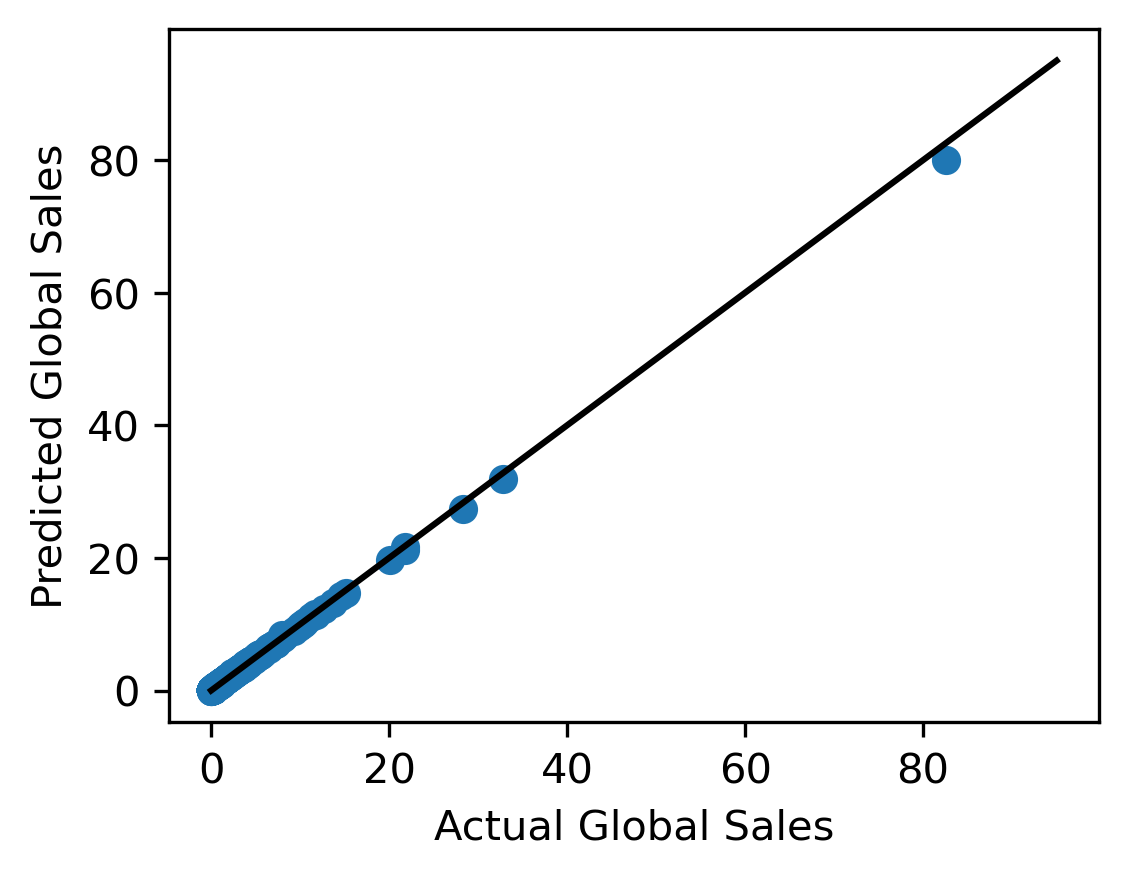

In [51]:
# Predicting the model outputs for the testing set.
yann_pred = model_ann.predict(xann_test)

# Plotting the predicted vs actual
plt.figure(figsize = (4, 3), dpi = 300)
plt.scatter(yann_test, yann_pred)
plt.plot([0, 95], [0, 95], 'k-')
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.show()

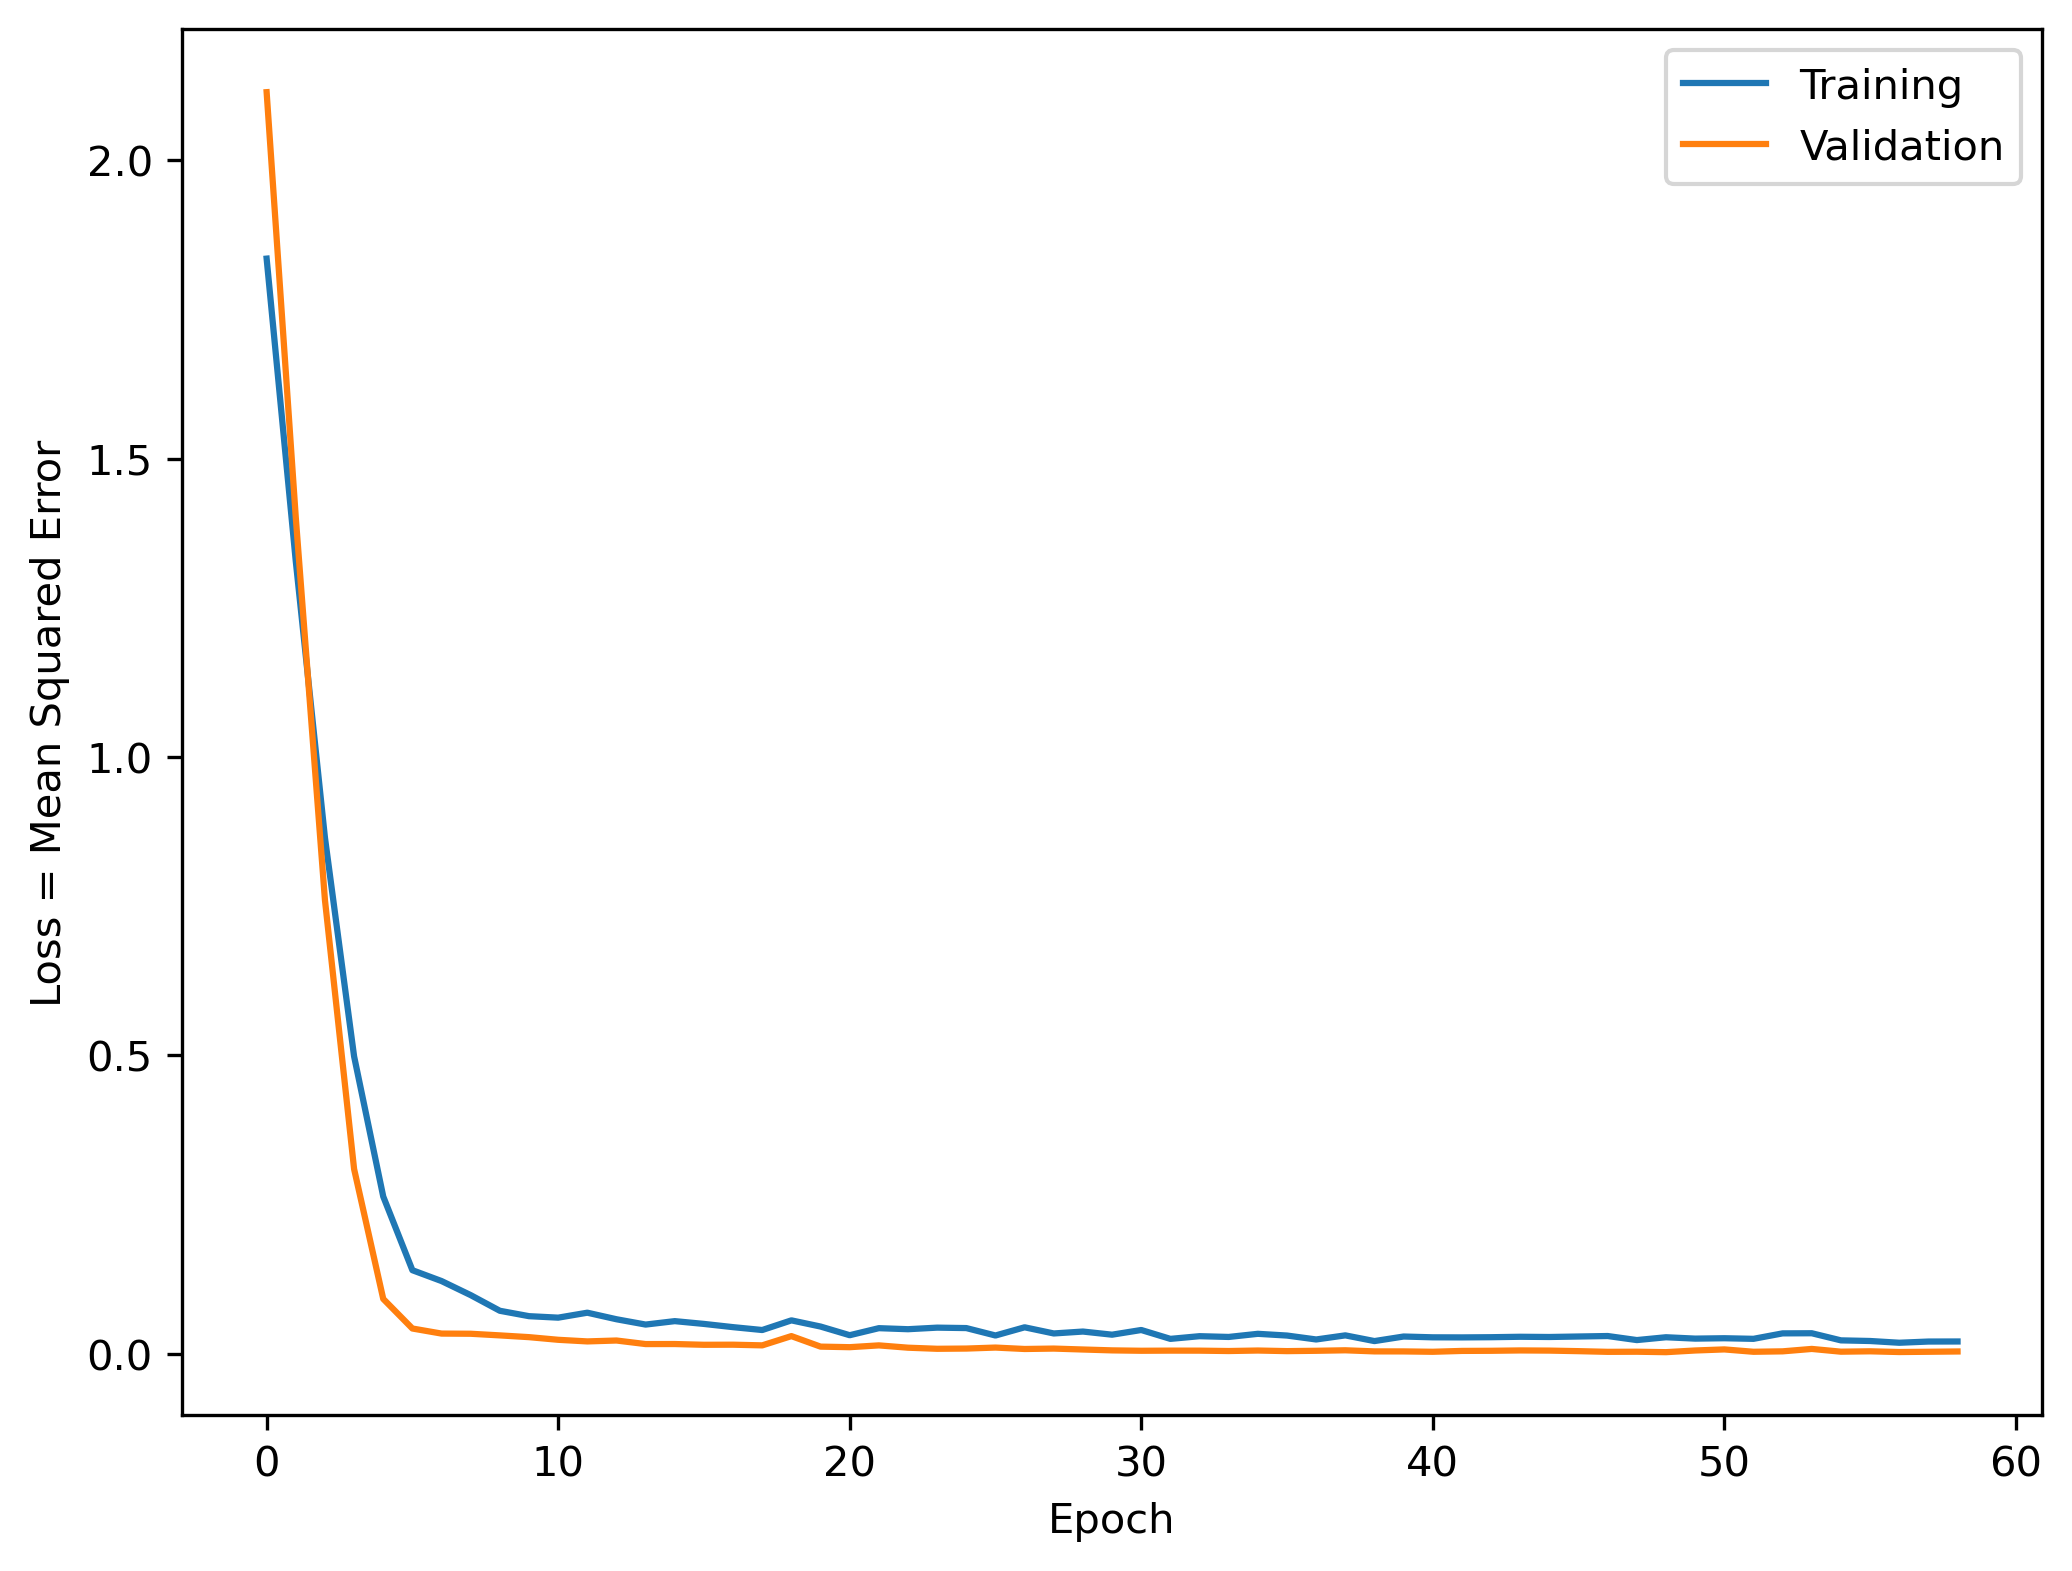

In [52]:
# Creating a dataframe containing the history of the fitting.
history_df = pd.DataFrame(history.history)

# Plotting the history of the training and validation losses.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.show()

> The model shows a rapid initial reduction in both training and validation losses, indicating it quickly learns patterns from the data. After about 5 epochs, the losses stabilize at very low values. The close alignment between training and validation losses suggests good generalization without signs of overfitting or underfitting. Minor fluctuations in validation loss are present but not significant, likely due to data noise.

### Part E: Best model for video games global sales prediction

In [53]:
# Combine the DataFrames
combined_results_3 = pd.concat([results_l_df.iloc[[1, 2, 3, 4]], results_ml_df, results_rf_df, results_ann_df, results_ann_df_2], ignore_index=True)

# Computing missing RMS Values using MSE column
combined_results_3['RMS'] = combined_results_3['RMS'].fillna(combined_results_3['MSE']**0.5)

# Defining desired order
desired_order = ['Model', 'MSE', 'MAE', 'RMS', 'R2']

# Print the combined DataFrame
combined_results_3[desired_order]

,Model,MSE,MAE,RMS,R2
0,NA_Sales,0.287345,0.202356,0.536046,0.930422
1,EU_Sales,0.299785,0.238920,0.547526,0.927409
2,JP_Sales,2.820534,0.518119,1.679444,0.317030
3,Other_Sales,1.167004,0.343432,1.080280,0.717419
4,Multiple Features,0.000027,0.002911,0.005225,0.999993
5,RF (Num. + Encoded Cat.),0.714320,0.040298,0.845174,0.827033
6,ANN Model,0.008412,0.035814,0.091715,0.997963
7,ANN Model (Tuned),0.004089,0.026434,0.063945,0.999010


> The best model for predicting global sales of video games is the Tuned ANN Model. It achieves the highest accuracy with an R2 of 0.999010, indicating it explains nearly all the variance in the target variable. Additionally, it has the second lowest MSE (0.004089) and MAE (0.026434) among all models, reflecting minimal prediction errors.

> While the Multiple Features model also performs exceptionally well with an R² of 0.9999, its near-zero errors suggest potential overfitting or an unrealistic fit, which may not generalize well to new data. Also, the Multi Features Regression model only featured numerical inputs, whereastThe Tuned ANN, captures numerical features and balaces, accuracy and robustness, making it the most reliable model for predicting global sales.

### Part F: Clustering with k-Means

In [54]:
# Importing required libraries for task

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [55]:
# Selecting relevant numerical features
features_kmeans = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
x_kmeans = vgames_df[features_kmeans]

In [56]:
# Define feature combinations
combination_1 = ['NA_Sales', 'EU_Sales']
combination_2 = ['JP_Sales', 'Other_Sales']
combination_3 = ['NA_Sales', 'Other_Sales']

In [57]:
# Defining function to output plot for optimal k

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def scaler_ploter_kmeans_elbow(selected_combination, dataframe): 
    
    # Defining x_kmeans
    x_kmeans = dataframe[selected_combination]
    
    # Scaling the features
    scaler_kmeans = StandardScaler()
    x_kmeans_scaled = scaler_kmeans.fit_transform(x_kmeans)

    inertia = []
    k_values=range(1, 11)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(x_kmeans_scaled)
        inertia.append(kmeans.inertia_)
    
    # Plotting the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia, 'bx-', label='Inertia')
    plt.title(f'Elbow Method for {selected_combination}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.legend()
    plt.show()

In [58]:
# Defining a Function to compute Silhouette Coefficient and Davies-Bouldin Index for k-Means

from sklearn.metrics import silhouette_score, davies_bouldin_score

def compute_kmeans_metrics(selected_combination, dataframe, n_clusters):

    # Defining x_kmeans
    x_kmeans = dataframe[selected_combination]
    
    # Scaling the features
    scaler_kmeans = StandardScaler()
    x_kmeans_scaled = scaler_kmeans.fit_transform(x_kmeans)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(x_kmeans_scaled)
    
    # Compute metrics
    silhouette_avg = silhouette_score(x_kmeans_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(x_kmeans_scaled, cluster_labels)
    
    # Add cluster labels to the DataFrame
    dataframe['Cluster'] = cluster_labels
    
    # Return metrics
    return {
        'dataframe': dataframe, 
        'cluster_labels': cluster_labels,
        'Silhouette Coefficient': silhouette_avg,
        'Davies-Bouldin Index': davies_bouldin
    }

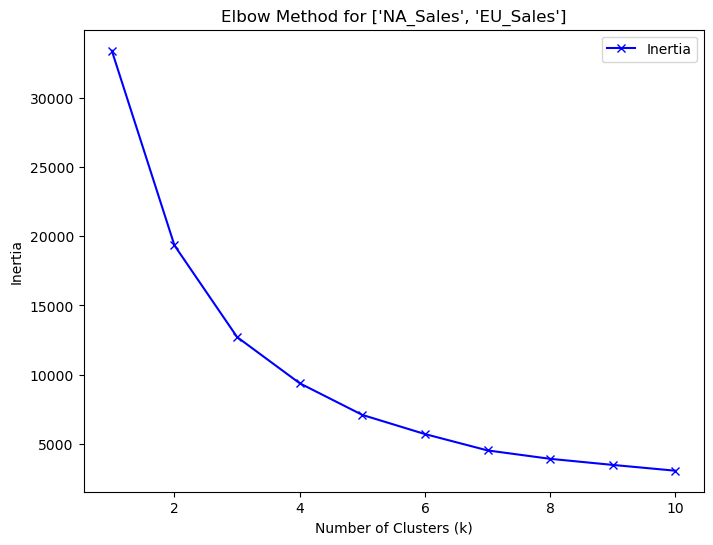

In [59]:
comb1_plot = scaler_ploter_kmeans_elbow(combination_1, vgames_df)
comb1_plot

> The "elbow" beiing where the rate of decrease in inertia slows down significantly, is most noticeable between k=2 and k=3, with a much smaller reduction afterward. Indicating the optimal K to be at 3.

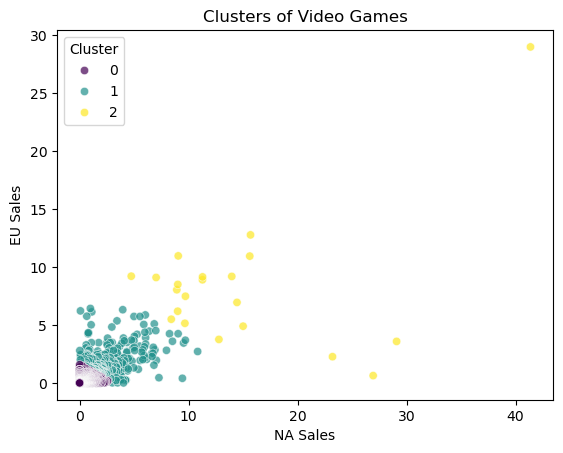

In [60]:
# Calling the function to populate the dataframe with correct cluster labels
kmeans_cluster = compute_kmeans_metrics(combination_1, vgames_df, 3)

# Plotting clusters for two features, NA_Sales and EU_Sales
sns.scatterplot(
    x=vgames_df['NA_Sales'], y=vgames_df['EU_Sales'], 
    hue=vgames_df['Cluster'], palette='viridis', alpha=0.7
)

plt.title('Clusters of Video Games')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.legend(title='Cluster', loc='best')
plt.show()

In [61]:
# Evaluating cluster metrics 
eval_kmeans_1 = compute_kmeans_metrics(combination_1, vgames_df, 3)

print(f"Clustering Metrics for Combination_1 (NA_Sales and EU_Sales)")
print(f"Silhouette Coefficient: {eval_kmeans_1['Silhouette Coefficient']:.6f}")
print(f"Davies-Bouldin Index: {eval_kmeans_1['Davies-Bouldin Index']:.6f}")

Clustering Metrics for Combination_1 (NA_Sales and EU_Sales)
Silhouette Coefficient: 0.874939
Davies-Bouldin Index: 0.651731


> - This high value Silhouette Coefficient (0.8749) indicates that the clusters are well-separated and distinct, with minimal overlap. Data points are closer to their assigned cluster center than to other clusters, suggesting strong and clear cluster formations.
Davies-Bouldin Index (0.6517):

> - A lower Davies-Bouldin Index (0.6517) implies better clustering. This value shows that the clusters are compact and well-separated, reinforcing the inference from the Silhouette Coefficient.

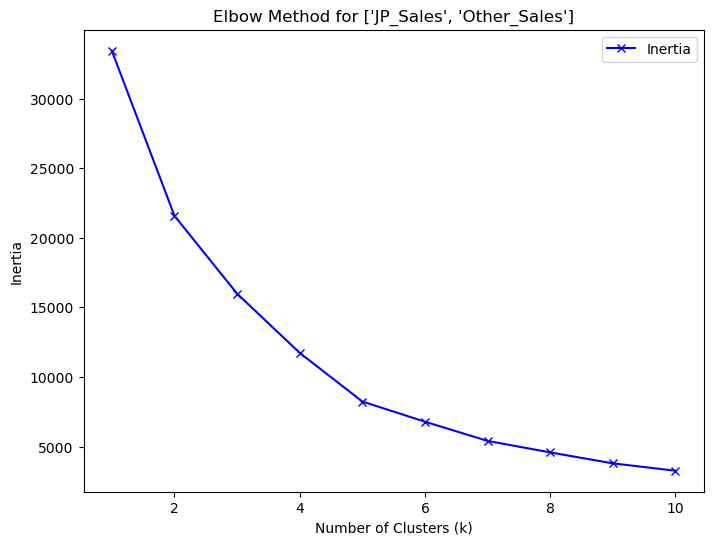

In [62]:
comb2_plot = scaler_ploter_kmeans_elbow(combination_2, vgames_df)
comb2_plot

> The "elbow" beiing where the rate of decrease in inertia slows down significantly, is most noticeable between k=2 and k=3, with a much smaller reduction afterward. Indicating the optimal K to be at 3 as well.

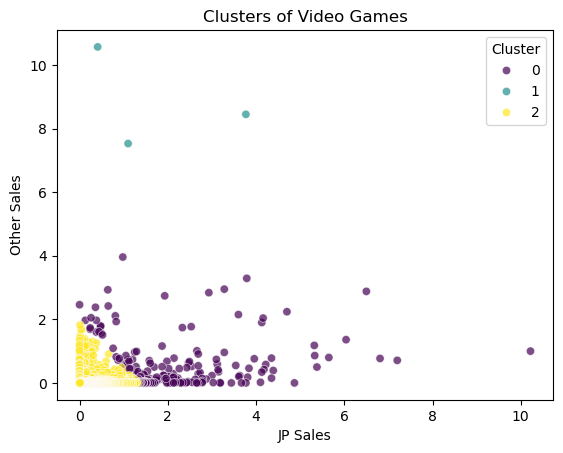

In [63]:
# Calling the function to populate the dataframe with correct cluster labels
kmeans_cluster = compute_kmeans_metrics(combination_2, vgames_df, 3)

# Plotting clusters for two features, JP_Sales and Other_Sales
sns.scatterplot(
    x=vgames_df['JP_Sales'], y=vgames_df['Other_Sales'],  
    hue=vgames_df['Cluster'], palette='viridis', alpha=0.7
)
plt.title('Clusters of Video Games')
plt.xlabel('JP Sales')
plt.ylabel('Other Sales')
plt.legend(title='Cluster')
plt.show()

In [64]:
# Evaluating cluster metrics 
eval_kmeans_2 = compute_kmeans_metrics(combination_2, vgames_df, 3)

print(f"Clustering Metrics for Combination_2 (JP Sales and Other Sales)")
print(f"Silhouette Coefficient: {eval_kmeans_2['Silhouette Coefficient']:.6f}")
print(f"Davies-Bouldin Index: {eval_kmeans_2['Davies-Bouldin Index']:.6f}")

Clustering Metrics for Combination_2 (JP Sales and Other Sales)
Silhouette Coefficient: 0.922250
Davies-Bouldin Index: 0.577797


> The combination of JP Sales and Other Sales forms distinct and meaningful clusters, as seen from the high Silhouette Coefficient (0.9222). The slightly lower Davies-Bouldin Index suggests better cluster compactness compared to combination 1 (NA Sales, EU Sales).

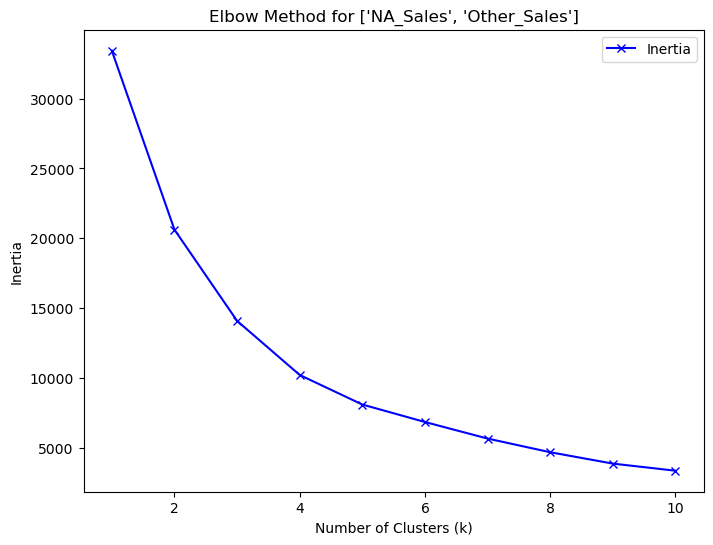

In [65]:
comb3_plot = scaler_ploter_kmeans_elbow(combination_3, vgames_df)
comb3_plot

> The "elbow" beiing where the rate of decrease in inertia slows down significantly, is most noticeable between k=2 and k=3, with a much smaller reduction afterward. Indicating the optimal K to be at 3 as well.

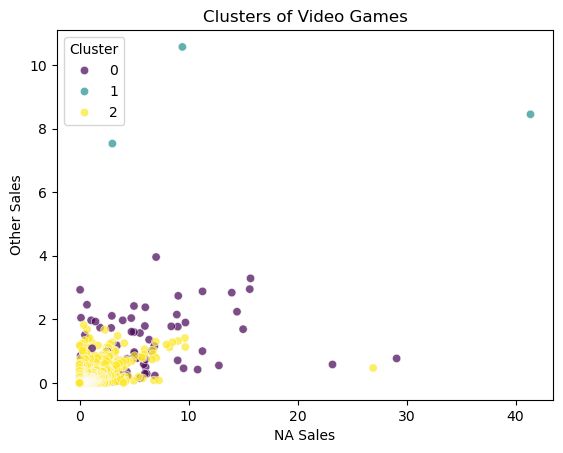

In [66]:
# Calling the function to populate the dataframe with correct cluster labels
kmeans_cluster = compute_kmeans_metrics(combination_2, vgames_df, 3)

# Plotting clusters for two features, JP_Sales and Other_Sales
sns.scatterplot(
    x=vgames_df['NA_Sales'], y=vgames_df['Other_Sales'],  
    hue=vgames_df['Cluster'], palette='viridis', alpha=0.7
)
plt.title('Clusters of Video Games')
plt.xlabel('NA Sales')
plt.ylabel('Other Sales')
plt.legend(title='Cluster')
plt.show()

In [67]:
# Evaluating cluster metrics 
eval_kmeans_3 = compute_kmeans_metrics(combination_3, vgames_df, 3)

print(f"Clustering Metrics for Combination_3 (NA Sales, Other Sales)")
print(f"Silhouette Coefficient: {eval_kmeans_3['Silhouette Coefficient']:.6f}")
print(f"Davies-Bouldin Index: {eval_kmeans_3['Davies-Bouldin Index']:.6f}")

Clustering Metrics for Combination_3 (NA Sales, Other Sales)
Silhouette Coefficient: 0.883035
Davies-Bouldin Index: 0.753483


> - A high Silhouette Coefficient (0.8830) indicates well-separated clusters, where data points are strongly associated with their own clusters and far from other clusters. This suggests that NA_Sales and Other_Sales create meaningful and distinct clusters.
>
> - A low Davies-Bouldin Index (0.7535, closer to 0) reflects compact and well-separated clusters. This value demonstrates that the clusters formed by this combination are not only distinct but also tightly grouped, reducing overlaps and inter-cluster similarity.

> - Of all combinations, Combination 1 (JP Sales and Other Sales) produces the best clustering results, having the highest Silhouette Coefficient (0.9222) and lowest Davies-Bouldin Index (0.5778) compared to other combinations

### DBSCAN Clustering Model

In [68]:
# Import necessary DBSCAN
from sklearn.cluster import DBSCAN

def compute_DBSCAN_metrics(selected_combination, dataframe):
    # Extracting input features
    x_DBSCAN = dataframe[selected_combination]
    
    # Scaling the input features
    scale = StandardScaler()
    x_DBSCAN_scaled = scale.fit_transform(x_DBSCAN)
    
    # Defining DBSCAN model parameters
    dbscan = DBSCAN(eps=0.5, min_samples=3)  # Specify eps and min_samples
    dbscan_labels_pred = dbscan.fit_predict(x_DBSCAN_scaled)
    
    # Evaluation metrics
    db_score_DBSCAN = davies_bouldin_score(x_DBSCAN_scaled, dbscan_labels_pred)
    s_score_DBSCAN = silhouette_score(x_DBSCAN_scaled, dbscan_labels_pred)
    
    # Returning the results
    return {
        'dataframe': dataframe, 
        'cluster_labels': dbscan_labels_pred,
        'Silhouette Coefficient': s_score_DBSCAN,
        'Davies-Bouldin Index': db_score_DBSCAN
    }

> Designed functioned to aid computation of evaluation metrics for different feature combinations using the DBSCAN model

In [69]:
# Evaluating cluster metrics 
eval_DBSCAN_1 = compute_DBSCAN_metrics(combination_1, vgames_df)
print(f"Clustering Metrics for Combination 1 (NA Sales, EU Sales)")
print(f"Silhouette Coefficient: {eval_DBSCAN_1['Silhouette Coefficient']:.4f}")
print(f"Davies-Bouldin Index: {eval_DBSCAN_1['Davies-Bouldin Index']:.4f}")

Clustering Metrics for Combination 1 (NA Sales, EU Sales)
Silhouette Coefficient: 0.8463
Davies-Bouldin Index: 1.2361


In [70]:
# Evaluating cluster metrics 
eval_DBSCAN_2 = compute_DBSCAN_metrics(combination_2, vgames_df)
print(f"Clustering Metrics for Combination 2 (JP Sales, Other Sales)")
print(f"Silhouette Coefficient: {eval_DBSCAN_2['Silhouette Coefficient']:.6f}")
print(f"Davies-Bouldin Index: {eval_DBSCAN_2['Davies-Bouldin Index']:.6f}")

Clustering Metrics for Combination 2 (JP Sales, Other Sales)
Silhouette Coefficient: 0.849896
Davies-Bouldin Index: 1.343593


In [71]:
# Evaluating cluster metrics 
eval_DBSCAN_3 = compute_DBSCAN_metrics(combination_3, vgames_df)
print(f"Clustering Metrics for Combination 3 (JP Sales, Other Sales)")
print(f"Silhouette Coefficient: {eval_DBSCAN_3['Silhouette Coefficient']:.6f}")
print(f"Davies-Bouldin Index: {eval_DBSCAN_3['Davies-Bouldin Index']:.6f}")

Clustering Metrics for Combination 3 (JP Sales, Other Sales)
Silhouette Coefficient: 0.885378
Davies-Bouldin Index: 0.923391


### DBSCAN Clustering Model (Fine-tuned)

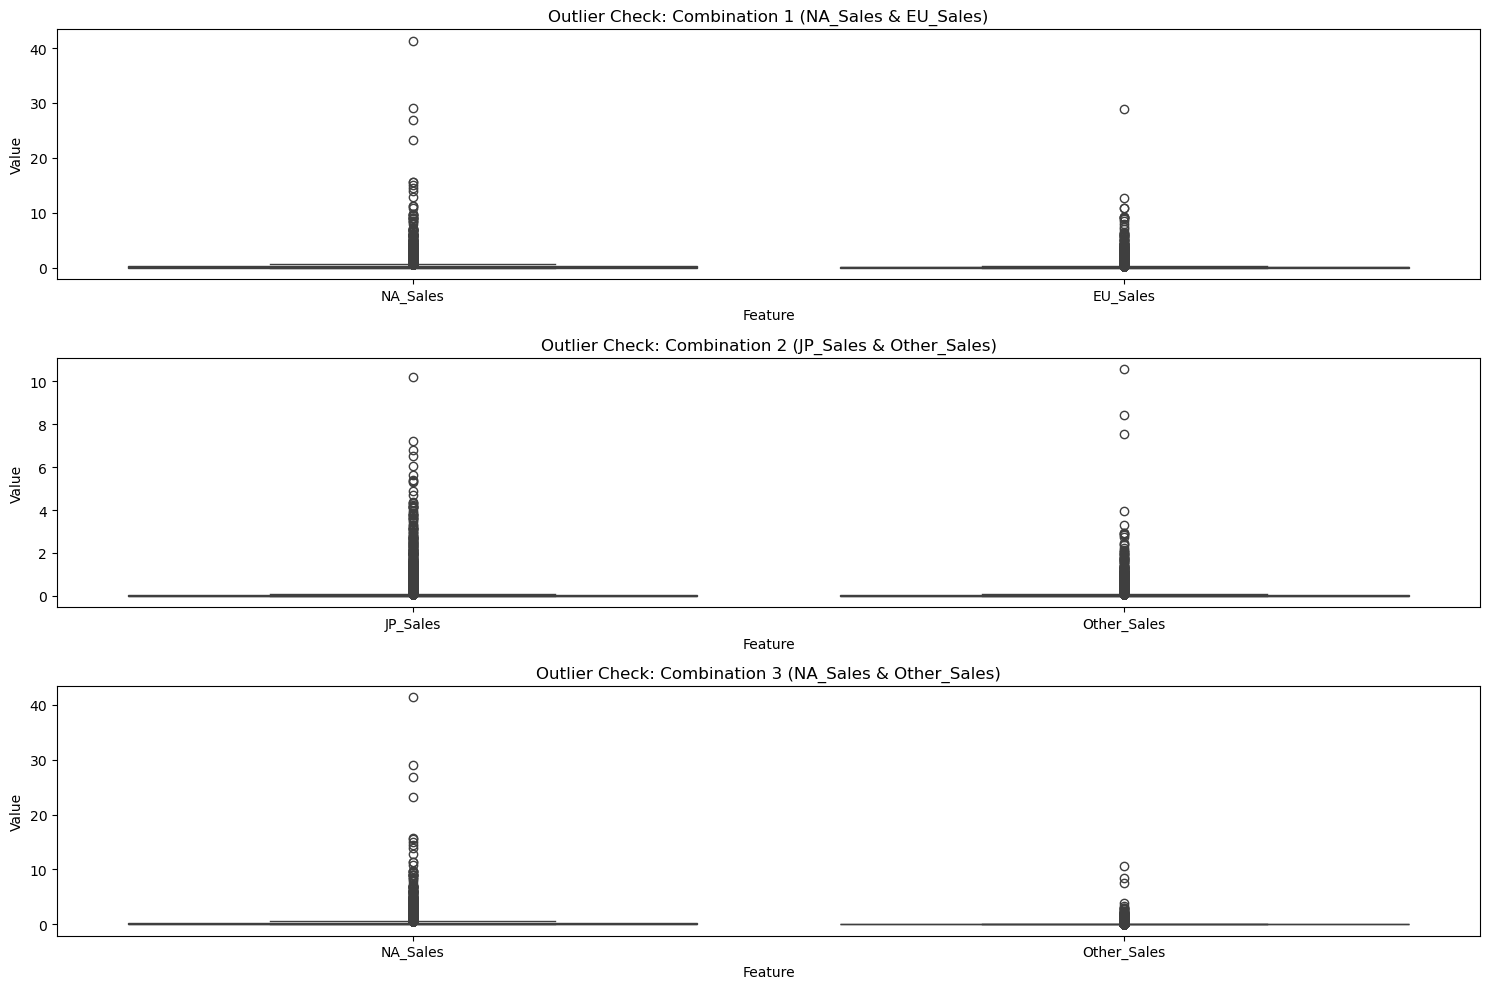

In [72]:
import seaborn as sns
plt.figure(figsize=(15, 10))

# Plot for Combination 1
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st plot
sns.boxplot(data=vgames_df[combination_1])
plt.title("Outlier Check: Combination 1 (NA_Sales & EU_Sales)")
plt.xlabel("Feature")
plt.ylabel("Value")

# Plot for Combination 2
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd plot
sns.boxplot(data=vgames_df[combination_2])
plt.title("Outlier Check: Combination 2 (JP_Sales & Other_Sales)")
plt.xlabel("Feature")
plt.ylabel("Value")

# Plot for Combination 3
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd plot
sns.boxplot(data=vgames_df[combination_3])
plt.title("Outlier Check: Combination 3 (NA_Sales & Other_Sales)")
plt.xlabel("Feature")
plt.ylabel("Value")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

> Identifying outliers in the combination is crucial for determining an appropriate threshold for the results. Based on the plot, it can be inferred that there are 4 outliers for NA_Sales and 1 outlier for EU_Sales, making a total of 5 outliers (Combination 1); 1 outlier for JP_Sales and 3 outlier for Other_Sales, making a total of 4 outliers (Combination 2) and; 4 outliers for NA_Sales and 3 outliers for Other_Sales (Combination 3), making a total of 7 outliers. These outliers will be accounted for as thresholds in the computation of Z-scores to effectively handle their influence on the dataset. This ensures that the k-NN distance values for the DBSCAN plot are computed more accurately, leading to a more reliable determination of the optimal eps value.

In [84]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import zscore # To manage outlier data while computing the optimal eps

In [82]:
# Defining the helper function to find optimal eps given
def compute_optimal_eps(dataframe, combination, k, threshold):
    z_scores = np.abs(zscore(dataframe[combination]))
    filtered_df = dataframe[(z_scores < threshold).all(axis=1)]
    
    # Scaling the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(filtered_df[combination])
    
    # Computing k-NN distances
    neighbors = NearestNeighbors(n_neighbors=k)
    distances, _ = neighbors.fit(scaled_data).kneighbors(scaled_data)
    
    # Sorting k-th distances
    kth_distances = np.sort(distances[:, k - 1], axis=0)
    
    # Finding the optimal eps at the elbow point
    rate_of_change = np.diff(kth_distances)
    elbow_index = np.argmax(rate_of_change)
    optimal_eps = kth_distances[elbow_index]
    
    return optimal_eps, kth_distances

In [83]:
# Defining combination thresholds based on outlier results from earlier
threshold_comb_1 = 5
threshold_comb_2 = 4
threshold_comb_3 = 7

# Calling helper function to compute optimal eps
optimal_eps_1, kth_distances_comb_1 = compute_optimal_eps(vgames_df, combination_1, 3, threshold_comb_1)
optimal_eps_2, kth_distances_comb_2 = compute_optimal_eps(vgames_df, combination_2, 3, threshold_comb_2)
optimal_eps_3, kth_distances_comb_3 = compute_optimal_eps(vgames_df, combination_3, 3, threshold_comb_3)

# Printing the optimal eps values
print("Optimal eps values:")
print(f"Combination 1 (NA_Sales & EU_Sales): {optimal_eps_1:.6f}")
print(f"Combination 2 (JP_Sales & Other_Sales): {optimal_eps_2:.6f}")
print(f"Combination 3 (NA_Sales & Other_Sales): {optimal_eps_3:.6f}")

Optimal eps values:
Combination 1 (NA_Sales & EU_Sales): 1.130000
Combination 2 (JP_Sales & Other_Sales): 1.548560
Combination 3 (NA_Sales & Other_Sales): 1.587902


> So outliers do not distort the k-NN distance plot and clustering, we will be capping them to ensure better results

> Programmatically ideentifying the optimum K as plotting the distance to the k-th nearest neighbor for each point in the dataset in ascending order did not produce the desired results. Programmatically, eps = 1.1300002 at k = 3.
> 

In [75]:
# Fine tuning DBSCAN for better results
def compute_DBSCAN_metrics_ft(selected_combination, dataframe, eps):
    # Extracting input features
    x_DBSCAN = dataframe[selected_combination]
    
    # Scaling the input features
    scale = StandardScaler()
    x_DBSCAN_scaled = scale.fit_transform(x_DBSCAN)
    
    # Defining DBSCAN model parameters
    dbscan = DBSCAN(eps=eps, min_samples=3)  # Specify eps and min_samples
    dbscan_labels_pred = dbscan.fit_predict(x_DBSCAN_scaled)
    
    # Filter out noise points (labeled as -1)
    valid_data = x_DBSCAN_scaled[dbscan_labels_pred != -1]
    valid_labels = dbscan_labels_pred[dbscan_labels_pred != -1]

    # Check if valid clusters exist
    if len(set(valid_labels)) > 1:  # Ensure there are at least 2 clusters
        # Compute evaluation metrics for valid clusters
        db_score_DBSCAN = davies_bouldin_score(valid_data, valid_labels)
        s_score_DBSCAN = silhouette_score(valid_data, valid_labels)
    else:
        # If only one cluster or no valid data, metrics are undefined
        db_score_DBSCAN = "Undefined (only one cluster)"
        s_score_DBSCAN = "Undefined (only one cluster)"

    # Add cluster labels to the DataFrame
    dataframe['Cluster'] = dbscan_labels_pred
    
    # Return metrics
    return {
        'dataframe': dataframe, 
        'cluster_labels': dbscan_labels_pred,
        'Silhouette Coefficient': s_score_DBSCAN,
        'Davies-Bouldin Index': db_score_DBSCAN
    }

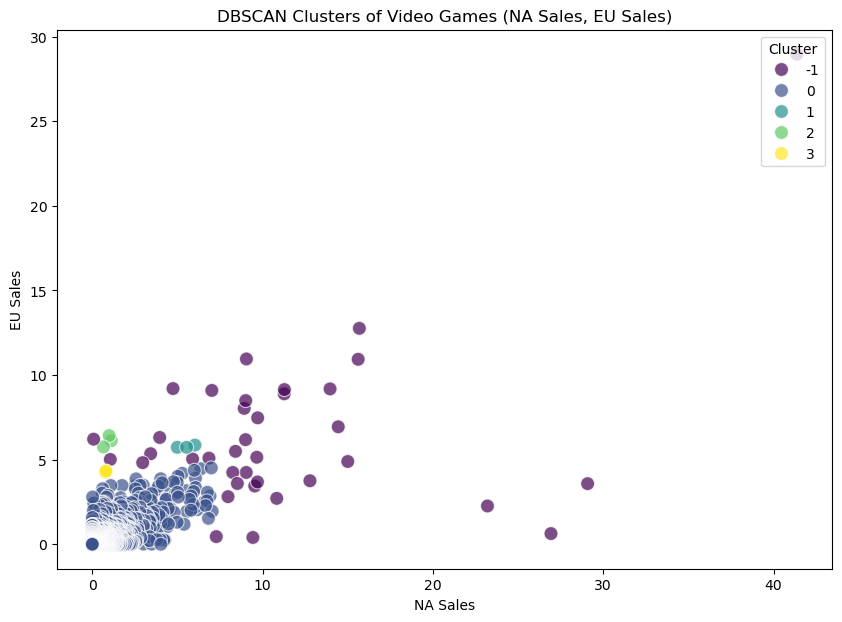

In [76]:
# Calling the function to compute DBSCAN clusters and metrics
dbscan_results_1 = compute_DBSCAN_metrics_ft(combination_1, vgames_df, 1.1300002)

# Plotting clusters for two features, NA_Sales and Other_Sales
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=vgames_df['NA_Sales'], y=vgames_df['EU_Sales'],  
    hue=vgames_df['Cluster'], palette='viridis', alpha=0.7, s=100 #Introduced to make points more legible 
)
plt.title('DBSCAN Clusters of Video Games (NA Sales, EU Sales)')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [77]:
# Evaluating cluster metrics for Combination 1 (NA Sales, EU Sales)
eval_DBSCAN_1ft = compute_DBSCAN_metrics_ft(combination_1, vgames_df, 1.1300002)
print(f"Clustering Metrics for Combination 1 (NA Sales, EU Sales)")
print(f"Silhouette Coefficient: {eval_DBSCAN_1ft['Silhouette Coefficient']:.6f}")
print(f"Davies-Bouldin Index: {eval_DBSCAN_1ft['Davies-Bouldin Index']:.6f}")

Clustering Metrics for Combination 1 (NA Sales, EU Sales)
Silhouette Coefficient: 0.915210
Davies-Bouldin Index: 0.155052


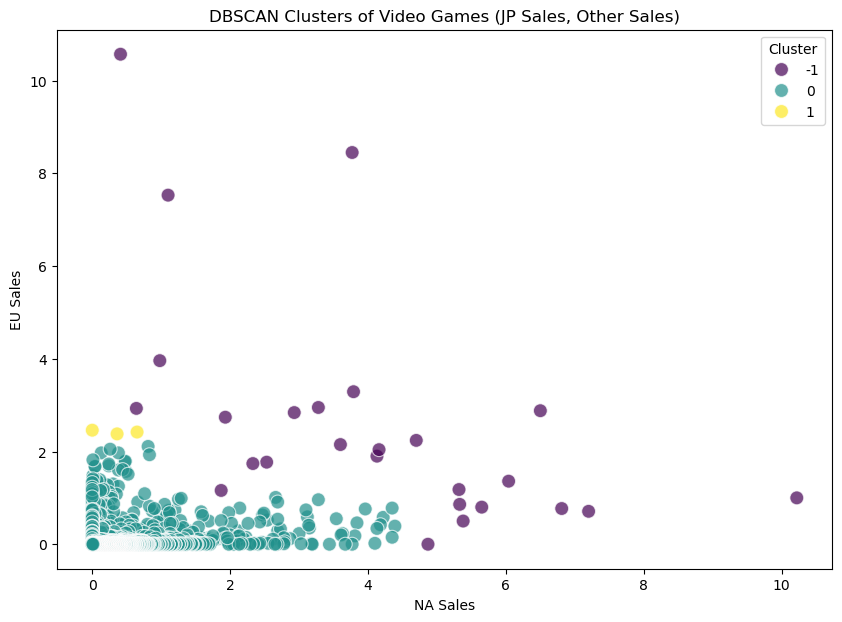

In [78]:
# Calling the function to compute DBSCAN clusters and metrics
dbscan_results_2 = compute_DBSCAN_metrics_ft(combination_2, vgames_df, 1.5486)

# Plotting clusters for two features, NA_Sales and Other_Sales
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=vgames_df['JP_Sales'], y=vgames_df['Other_Sales'],  
    hue=vgames_df['Cluster'], palette='viridis', alpha=0.7, s=100
)
plt.title('DBSCAN Clusters of Video Games (JP Sales, Other Sales)')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [79]:
# Evaluating cluster metrics for Combination 2 (NA Sales, EU Sales)
eval_DBSCAN_2ft = compute_DBSCAN_metrics_ft(combination_2, vgames_df, 1.5486)
print(f"Clustering Metrics for Combination 2 (JP Sales, Other Sales)")
print(f"Silhouette Coefficient: {eval_DBSCAN_2ft['Silhouette Coefficient']:.6f}")
print(f"Davies-Bouldin Index: {eval_DBSCAN_2ft['Davies-Bouldin Index']:.6f}")

Clustering Metrics for Combination 2 (JP Sales, Other Sales)
Silhouette Coefficient: 0.943641
Davies-Bouldin Index: 0.101093


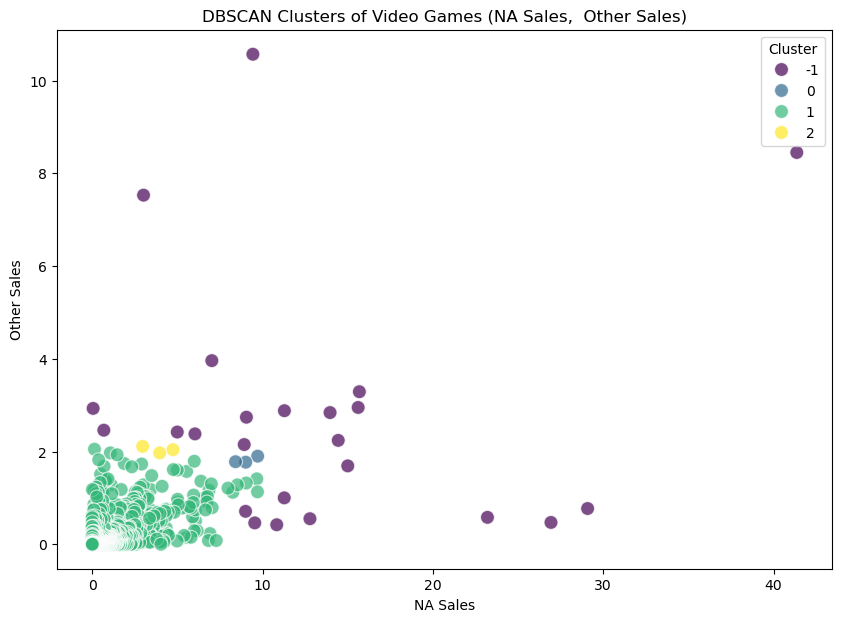

In [80]:
# Calling the function to compute DBSCAN clusters and metrics
dbscan_results_3 = compute_DBSCAN_metrics_ft(combination_3, vgames_df, 1.5879)

# Plotting clusters for two features, NA_Sales and Other_Sales
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=vgames_df['NA_Sales'], y=vgames_df['Other_Sales'],  
    hue=vgames_df['Cluster'], palette='viridis', alpha=0.7, s=100
)
plt.title('DBSCAN Clusters of Video Games (NA Sales,  Other Sales)')
plt.xlabel('NA Sales')
plt.ylabel('Other Sales')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [81]:
# Evaluating cluster metrics for Combination 3 (NA Sales, Other Sales)
eval_DBSCAN_3ft = compute_DBSCAN_metrics_ft(combination_3, vgames_df, 1.5879)
print(f"Clustering Metrics for Combination 3 (NA Sales, Other Sales)")
print(f"Silhouette Coefficient: {eval_DBSCAN_3ft['Silhouette Coefficient']:.6f}")
print(f"Davies-Bouldin Index: {eval_DBSCAN_3ft['Davies-Bouldin Index']:.6f}")

Clustering Metrics for Combination 3 (NA Sales, Other Sales)
Silhouette Coefficient: 0.940562
Davies-Bouldin Index: 0.198098


> Overall, the fine-tuned DBSCAN Model produces better results in terms of cluster evaluation like Silhouette Coefficient,
Davies-Bouldin Index.